# Ezra's Project

In [1]:
import os     
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns 
import scipy as sc
from scipy.stats import chi2_contingency
import bs4
from bs4 import BeautifulSoup
import requests
from collections import Counter
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score
import re

In [2]:
from sklearn import preprocessing, linear_model, model_selection
from sklearn.model_selection import train_test_split

הפרוייקט ישאב נתוני מוצרים מאתרי האונליין של רשתות השיווק בארץ (שופרסל,וויקטורי).

המטרה הסופית - למידת מכונה שתאפשר לי לקבוע מחיר התחלתי למוצרים עבור סופר מתחרה. 

<b>Step 1:</b> Crawling

a. Shupersal online website. 

b. Victory online website. 

In [3]:
url= "https://www.shufersal.co.il/online/"
responsel= requests.get(url)

In [4]:
responsel

<Response [200]>

In [5]:
soup= BeautifulSoup(responsel.content, "html.parser")

 המוצרים באתר מסודרים על פי קטגוריות המופיעות בעמוד הראשון. בשלב ראשון של תהליך משיכת המידע, אמשוך טבלת קישורים הכוללת את שם הקטגוריה והקישור אל הדף עם המוצרים. 

In [6]:
tag=soup.find_all(attrs={"class":"forthMenu collapse"})
categories=[]
links=[]

In [7]:
for x in tag:
    href=x.find_all('a')
    for a in href:
        links.append(a['href'])
        categories.append(a.text.strip())
df=pd.DataFrame({"category":categories, "link":links})       
df

,category,link
0,ירקות,/online/he/%D7%A7%D7%98%D7%92%D7%95%D7%A8%D7%9...
1,פירות,/online/he/%D7%A7%D7%98%D7%92%D7%95%D7%A8%D7%9...
2,פיצוחים ופירות יבשים,/online/he/%D7%A7%D7%98%D7%92%D7%95%D7%A8%D7%9...
3,יוגורט ומשקאות יוגורט,/online/he/%D7%A7%D7%98%D7%92%D7%95%D7%A8%D7%9...
4,מעדנים וקינוחים,/online/he/%D7%A7%D7%98%D7%92%D7%95%D7%A8%D7%9...
...,...,...
231,מתוקים,/online/he/%D7%A7%D7%98%D7%92%D7%95%D7%A8%D7%9...
232,מוצרי נקיון אקולוגיים,/online/he/%D7%A7%D7%98%D7%92%D7%95%D7%A8%D7%9...
233,תוספי מזון,/online/he/%D7%A7%D7%98%D7%92%D7%95%D7%A8%D7%9...
234,ויטמינים,/online/he/%D7%A7%D7%98%D7%92%D7%95%D7%A8%D7%9...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  236 non-null    object
 1   link      236 non-null    object
dtypes: object(2)
memory usage: 3.8+ KB


In [9]:
# נדפיס את שמות כלל הקטגוריות שקיבלנו על מנת לראות שאכן כלל המידע הדרוש נמשך 
i=0
for x in df.category.unique():
    print (f"{i}) {x}") 
    i=i+1 

0) ירקות
1) פירות
2) פיצוחים ופירות יבשים
3) יוגורט ומשקאות יוגורט
4) מעדנים וקינוחים
5) מוצרי חלב וביצים
6) מדף הגבינות
7) גבינות מעדנייה
8) מוצרים לאפיה ובישול
9) תחליפי חלב וטופו
10) מוצרי עוף והודו
11) בשר בקר וכבש
12) דגים
13) מוצרי בשר "על האש"
14) מוצרים מוכנים לאכילה
15) מנגלים ומוצרים נילווים
16) לחמים, לחמניות ופיתות מהמאפייה
17) לחם, לחמניות ופיתות
18) מאפים ועוגות מהמאפיה
19) עוגות ארוזות
20) משקאות חריפים
21) בירה ומשקאות אנרגיה
22) יינות ותירוש
23) משקאות קלים
24) מים וסודה
25) תה וקפה
26) קפסולות ופולים לאספרסו
27) סיגריות וגפרורים
28) ירקות ופירות קפואים
29) מוצרי בשר, עוף ודגים קפואים
30) מוצרי בצק ומאפה קפוא
31) חומוס וסלטים
32) נקניקים ודגים מעושנים
33) קינוחים ומנות אחרונות
34) אוכל מוכן/ להכנה מהירה
35) תחליפי בשר קפוא
36) גלידות
37) קפואים לנמנעים מגלוטן
38) פסטה, אורז , קוסקוס וקטניות
39) רטבים ותוספות
40) שמן חומץ ומיץ לימון
41) שימורים
42) מוצרי יסוד ותבלינים
43) דבש ריבות וממרחים
44) מרקים, קרוטונים ותבשילים
45) מיוחדים
46) דגנים וחטיפי דגנים
47) ממתקים
48) חט

<b>פונקציית משיכת המידע ע"פ קטגוריה:</b>

In [10]:
## הפונקציה שמייצרת דאטה פריים של מוצרים עבור כל תת-קטגוריה לפי יחידה, משקל, חבילה ומוצר כפי שמסודר באתר  
def create_df1(category, url):
    ##
    links2=[]
    products=[] 
    prices=[] 
    sizes=[] 
    suplier=[] 
    responsel= requests.get(url)
    soup= BeautifulSoup(responsel.content, "html.parser")
    print(f"for {category} requst: {responsel}")
    tag1= soup.find_all("li", attrs={"class":"miglog-prod miglog-sellingmethod-by_unit"})
    tag2= soup.find_all("li", attrs={"class":"miglog-prod miglog-sellingmethod-by_weight"})
    tag3= soup.find_all("li", attrs={"class":"miglog-prod miglog-sellingmethod-by_package"})
    tag4= soup.find_all("li", attrs={"class":"miglog-prod"})
    tags=[tag1,tag2,tag3,tag4]
    for tag in tags:
        for li in tag: #product name:
            n1=li.find_all(attrs={"class":"textContainer"})
            n2=n1[0].find_all(attrs={"class":"text"})
            products.append(n2[0].text.strip())
            #product price: 
            
        for li in tag: # prices 
            n1=li.find_all(attrs={"class":"textContainer"})
            n2=n1[0].find_all(attrs={"class":"number"})
            prices.append(n2[0].text)
            
            # supplier and size 
        for li in tag:  
            n1=li.find_all(attrs={"class":"textContainer"})
            n3=n1[0].find_all(attrs={"class":"labelsListContainer"})
            n4=n3[0].find_all(attrs={"class":"smallText"})
            n5=n4[0].find_all("span") 
            if len(n5)>1:
                sizes.append(n5[0].text.strip())
                suplier.append(n5[1].text.strip())
            else: 
                sizes.append(None)
                suplier.append(None)

    
    df=pd.DataFrame({"super":"שופרסל","catgory":category,"product":products, "suplier":suplier, "sizes":sizes,"price":prices})
    return df 

<b>פונקצייה למשיכת כלל העמודים עבור כל קטגוריה:</b>

אציין שהאתר מסמלץ מעבר עמודים זמן גלילת העמוד מטה ואין צורך בלחיצה על פתור <b>עמ' הבא</b>"

הבנת החלוקה לעמודים בוצעה ע"י התבוננות בחלון הבדיקה בלשונית הרשת. 

In [11]:
def getDF_all_pages(category, url):
    responsel= requests.get(url)
    str_soup= str(BeautifulSoup(responsel.content, "html.parser"))
    num_of_pages=re.findall('data-pages="(\d\d*)"',str_soup)
    print(f"num of pages for {category} is : {num_of_pages[0]}")
    num=int(num_of_pages[0])
    extra="/fragment?q=:relevance&page="
    df_lst=[]
    for x in range(num):
        df=create_df1(category,f"{url}{extra}{x}")
        df_lst.append(df)
    df_lst= pd.concat(df_lst, axis=0)
    df_lst.reset_index(inplace=True)
    return df_lst

<b>דוגמא למשיכת מידע עבור קטגוריה אחת מטבלת הקישורים:</b> 

In [12]:
#ניסיון לבדיקה שהפונקציות אכן עובדות עבור לינק מהטבלת הקישורים 
try1= getDF_all_pages(df.iloc[0,0],f"{url}{df.iloc[0,1]}")

num of pages for ירקות is : 15
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>


In [13]:
try1 ## הטבלה שהתקבלה 

,index,super,catgory,product,suplier,sizes,price
0,0,שופרסל,ירקות,עגבניה שרי מנומר,שופרסל,460גרם,9.90
1,1,שופרסל,ירקות,עגבניה שרי כתום,שופרסל,460גרם,9.90
2,2,שופרסל,ירקות,עגבניה שרי בודד,שופרסל,יחידה,9.90
3,3,שופרסל,ירקות,מיקס עגבניה שרי,שופרסל,460גרם,9.90
4,4,שופרסל,ירקות,עגבניה שרי יובל ליקופן,קטיף,460 גרם,9.90
...,...,...,...,...,...,...,...
793,133,שופרסל,ירקות,עציץ בינוני 3,ליידי דיאן,יחידה,35.00
794,134,שופרסל,ירקות,עציץ בינוני,ליידי דיאן,יחידה,27.00
795,135,שופרסל,ירקות,עציץ קטן 2,ליידי דיאן,יחידה,17.00
796,136,שופרסל,ירקות,זר מיוחד מס' 15,ליידי דיאן,יחידה,75.00


לאחר שבדקתי שהפונקציות עובדות אבצע אותן עבור כל אחת מהשורות בטבלת הקישורים על מנת לקבל טבלה אחודה. 
חריגים הם שורות 85,112,133 - עמודים אלה באתר בנויים באופן שונה משאר העמודים בטבלה, לאור העובדה שמדובר בשלוש קטגוריות בלבד החלטתי להתעלם מהן.

In [14]:
count=df.link.count()
temp_df=pd.DataFrame()
df_union=pd.DataFrame({"super":[],"catgory":[],"product":[], "suplier":[], "sizes":[],"price":[]})
for i in range(count):
    if((i!=85) and (i!=112)and (i!=133)):
        print(f"\n***********{df.iloc[i,0]}************\n**********{i}/{count}*********\n")
        temp_df=getDF_all_pages(df.iloc[i,0] ,f"{url}{df.iloc[i,1]}")
        df_union=pd.concat([df_union,temp_df], axis=0)


***********ירקות************
**********0/236*********

num of pages for ירקות is : 15
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>
for ירקות requst: <Response [200]>

***********פירות************
**********1/236*********

num of pages for פירות is : 4
for פירות requst: <Response [200]>
for פירות requst: <Response [200]>
for פירות requst: <Response [200]>
for פירות requst: <Response [200]>

***********פיצוחים ופירות יבשים************
**********2/236*********

num of pages for פיצוחים ופירות יבשים is : 11
for פיצוחים ופירות יבשים requst: <Response [2

for בירה ומשקאות אנרגיה requst: <Response [200]>
for בירה ומשקאות אנרגיה requst: <Response [200]>
for בירה ומשקאות אנרגיה requst: <Response [200]>
for בירה ומשקאות אנרגיה requst: <Response [200]>
for בירה ומשקאות אנרגיה requst: <Response [200]>

***********יינות ותירוש************
**********22/236*********

num of pages for יינות ותירוש is : 9
for יינות ותירוש requst: <Response [200]>
for יינות ותירוש requst: <Response [200]>
for יינות ותירוש requst: <Response [200]>
for יינות ותירוש requst: <Response [200]>
for יינות ותירוש requst: <Response [200]>
for יינות ותירוש requst: <Response [200]>
for יינות ותירוש requst: <Response [200]>
for יינות ותירוש requst: <Response [200]>
for יינות ותירוש requst: <Response [200]>

***********משקאות קלים************
**********23/236*********

num of pages for משקאות קלים is : 10
for משקאות קלים requst: <Response [200]>
for משקאות קלים requst: <Response [200]>
for משקאות קלים requst: <Response [200]>
for משקאות קלים requst: <Response [200]>
for משקאות ק

num of pages for מוצרי יסוד ותבלינים is : 15
for מוצרי יסוד ותבלינים requst: <Response [200]>
for מוצרי יסוד ותבלינים requst: <Response [200]>
for מוצרי יסוד ותבלינים requst: <Response [200]>
for מוצרי יסוד ותבלינים requst: <Response [200]>
for מוצרי יסוד ותבלינים requst: <Response [200]>
for מוצרי יסוד ותבלינים requst: <Response [200]>
for מוצרי יסוד ותבלינים requst: <Response [200]>
for מוצרי יסוד ותבלינים requst: <Response [200]>
for מוצרי יסוד ותבלינים requst: <Response [200]>
for מוצרי יסוד ותבלינים requst: <Response [200]>
for מוצרי יסוד ותבלינים requst: <Response [200]>
for מוצרי יסוד ותבלינים requst: <Response [200]>
for מוצרי יסוד ותבלינים requst: <Response [200]>
for מוצרי יסוד ותבלינים requst: <Response [200]>
for מוצרי יסוד ותבלינים requst: <Response [200]>

***********דבש ריבות וממרחים************
**********43/236*********

num of pages for דבש ריבות וממרחים is : 6
for דבש ריבות וממרחים requst: <Response [200]>
for דבש ריבות וממרחים requst: <Response [200]>
for דבש ריבות ו

num of pages for לתינוק- טיפוח, הלבשה ואביזרים is : 18
for לתינוק- טיפוח, הלבשה ואביזרים requst: <Response [200]>
for לתינוק- טיפוח, הלבשה ואביזרים requst: <Response [200]>
for לתינוק- טיפוח, הלבשה ואביזרים requst: <Response [200]>
for לתינוק- טיפוח, הלבשה ואביזרים requst: <Response [200]>
for לתינוק- טיפוח, הלבשה ואביזרים requst: <Response [200]>
for לתינוק- טיפוח, הלבשה ואביזרים requst: <Response [200]>
for לתינוק- טיפוח, הלבשה ואביזרים requst: <Response [200]>
for לתינוק- טיפוח, הלבשה ואביזרים requst: <Response [200]>
for לתינוק- טיפוח, הלבשה ואביזרים requst: <Response [200]>
for לתינוק- טיפוח, הלבשה ואביזרים requst: <Response [200]>
for לתינוק- טיפוח, הלבשה ואביזרים requst: <Response [200]>
for לתינוק- טיפוח, הלבשה ואביזרים requst: <Response [200]>
for לתינוק- טיפוח, הלבשה ואביזרים requst: <Response [200]>
for לתינוק- טיפוח, הלבשה ואביזרים requst: <Response [200]>
for לתינוק- טיפוח, הלבשה ואביזרים requst: <Response [200]>
for לתינוק- טיפוח, הלבשה ואביזרים requst: <Response [200]>
f

for מוצרים לבישול ואפיה requst: <Response [200]>
for מוצרים לבישול ואפיה requst: <Response [200]>
for מוצרים לבישול ואפיה requst: <Response [200]>
for מוצרים לבישול ואפיה requst: <Response [200]>
for מוצרים לבישול ואפיה requst: <Response [200]>
for מוצרים לבישול ואפיה requst: <Response [200]>
for מוצרים לבישול ואפיה requst: <Response [200]>
for מוצרים לבישול ואפיה requst: <Response [200]>
for מוצרים לבישול ואפיה requst: <Response [200]>
for מוצרים לבישול ואפיה requst: <Response [200]>
for מוצרים לבישול ואפיה requst: <Response [200]>
for מוצרים לבישול ואפיה requst: <Response [200]>
for מוצרים לבישול ואפיה requst: <Response [200]>
for מוצרים לבישול ואפיה requst: <Response [200]>
for מוצרים לבישול ואפיה requst: <Response [200]>

***********דגנים, משקאות ומתוקים************
**********74/236*********

num of pages for דגנים, משקאות ומתוקים is : 10
for דגנים, משקאות ומתוקים requst: <Response [200]>
for דגנים, משקאות ומתוקים requst: <Response [200]>
for דגנים, משקאות ומתוקים requst: <Response

for סלולאר, שעונים, טאבלטים ומצלמות requst: <Response [200]>
for סלולאר, שעונים, טאבלטים ומצלמות requst: <Response [200]>
for סלולאר, שעונים, טאבלטים ומצלמות requst: <Response [200]>
for סלולאר, שעונים, טאבלטים ומצלמות requst: <Response [200]>
for סלולאר, שעונים, טאבלטים ומצלמות requst: <Response [200]>
for סלולאר, שעונים, טאבלטים ומצלמות requst: <Response [200]>
for סלולאר, שעונים, טאבלטים ומצלמות requst: <Response [200]>
for סלולאר, שעונים, טאבלטים ומצלמות requst: <Response [200]>
for סלולאר, שעונים, טאבלטים ומצלמות requst: <Response [200]>
for סלולאר, שעונים, טאבלטים ומצלמות requst: <Response [200]>

***********מחשבים וגיימינג************
**********88/236*********

num of pages for מחשבים וגיימינג is : 6
for מחשבים וגיימינג requst: <Response [200]>
for מחשבים וגיימינג requst: <Response [200]>
for מחשבים וגיימינג requst: <Response [200]>
for מחשבים וגיימינג requst: <Response [200]>
for מחשבים וגיימינג requst: <Response [200]>
for מחשבים וגיימינג requst: <Response [200]>

***********צ

for מיקסרים, בלנדרים ומעבדי מזון requst: <Response [200]>
for מיקסרים, בלנדרים ומעבדי מזון requst: <Response [200]>
for מיקסרים, בלנדרים ומעבדי מזון requst: <Response [200]>
for מיקסרים, בלנדרים ומעבדי מזון requst: <Response [200]>
for מיקסרים, בלנדרים ומעבדי מזון requst: <Response [200]>
for מיקסרים, בלנדרים ומעבדי מזון requst: <Response [200]>
for מיקסרים, בלנדרים ומעבדי מזון requst: <Response [200]>
for מיקסרים, בלנדרים ומעבדי מזון requst: <Response [200]>

***********קומקומים ומכונות קפה************
**********102/236*********

num of pages for קומקומים ומכונות קפה is : 11
for קומקומים ומכונות קפה requst: <Response [200]>
for קומקומים ומכונות קפה requst: <Response [200]>
for קומקומים ומכונות קפה requst: <Response [200]>
for קומקומים ומכונות קפה requst: <Response [200]>
for קומקומים ומכונות קפה requst: <Response [200]>
for קומקומים ומכונות קפה requst: <Response [200]>
for קומקומים ומכונות קפה requst: <Response [200]>
for קומקומים ומכונות קפה requst: <Response [200]>
for קומקומים ומכו

for מזנונים, כסאות ושולחנות קפה requst: <Response [200]>
for מזנונים, כסאות ושולחנות קפה requst: <Response [200]>
for מזנונים, כסאות ושולחנות קפה requst: <Response [200]>
for מזנונים, כסאות ושולחנות קפה requst: <Response [200]>
for מזנונים, כסאות ושולחנות קפה requst: <Response [200]>
for מזנונים, כסאות ושולחנות קפה requst: <Response [200]>
for מזנונים, כסאות ושולחנות קפה requst: <Response [200]>
for מזנונים, כסאות ושולחנות קפה requst: <Response [200]>

***********נוי ועיצוב הבית************
**********117/236*********

num of pages for נוי ועיצוב הבית is : 14
for נוי ועיצוב הבית requst: <Response [200]>
for נוי ועיצוב הבית requst: <Response [200]>
for נוי ועיצוב הבית requst: <Response [200]>
for נוי ועיצוב הבית requst: <Response [200]>
for נוי ועיצוב הבית requst: <Response [200]>
for נוי ועיצוב הבית requst: <Response [200]>
for נוי ועיצוב הבית requst: <Response [200]>
for נוי ועיצוב הבית requst: <Response [200]>
for נוי ועיצוב הבית requst: <Response [200]>
for נוי ועיצוב הבית requst: <R

for אביזרים לשירותים requst: <Response [200]>
for אביזרים לשירותים requst: <Response [200]>
for אביזרים לשירותים requst: <Response [200]>

***********ריהוט גן************
**********130/236*********

num of pages for ריהוט גן is : 7
for ריהוט גן requst: <Response [200]>
for ריהוט גן requst: <Response [200]>
for ריהוט גן requst: <Response [200]>
for ריהוט גן requst: <Response [200]>
for ריהוט גן requst: <Response [200]>
for ריהוט גן requst: <Response [200]>
for ריהוט גן requst: <Response [200]>

***********אחסון חוץ************
**********131/236*********

num of pages for אחסון חוץ is : 5
for אחסון חוץ requst: <Response [200]>
for אחסון חוץ requst: <Response [200]>
for אחסון חוץ requst: <Response [200]>
for אחסון חוץ requst: <Response [200]>
for אחסון חוץ requst: <Response [200]>

***********גרילים, מעשנות ואביזרים למנגל************
**********132/236*********

num of pages for גרילים, מעשנות ואביזרים למנגל is : 8
for גרילים, מעשנות ואביזרים למנגל requst: <Response [200]>
for גרילים, מעשנ

for צעצועים ומשחקים requst: <Response [200]>

***********ציוד לגן ולבית ספר************
**********145/236*********

num of pages for ציוד לגן ולבית ספר is : 9
for ציוד לגן ולבית ספר requst: <Response [200]>
for ציוד לגן ולבית ספר requst: <Response [200]>
for ציוד לגן ולבית ספר requst: <Response [200]>
for ציוד לגן ולבית ספר requst: <Response [200]>
for ציוד לגן ולבית ספר requst: <Response [200]>
for ציוד לגן ולבית ספר requst: <Response [200]>
for ציוד לגן ולבית ספר requst: <Response [200]>
for ציוד לגן ולבית ספר requst: <Response [200]>
for ציוד לגן ולבית ספר requst: <Response [200]>

***********כלי עבודה************
**********146/236*********

num of pages for כלי עבודה is : 29
for כלי עבודה requst: <Response [200]>
for כלי עבודה requst: <Response [200]>
for כלי עבודה requst: <Response [200]>
for כלי עבודה requst: <Response [200]>
for כלי עבודה requst: <Response [200]>
for כלי עבודה requst: <Response [200]>
for כלי עבודה requst: <Response [200]>
for כלי עבודה requst: <Response [200]>


for בישום גברים requst: <Response [200]>
for בישום גברים requst: <Response [200]>
for בישום גברים requst: <Response [200]>
for בישום גברים requst: <Response [200]>
for בישום גברים requst: <Response [200]>
for בישום גברים requst: <Response [200]>
for בישום גברים requst: <Response [200]>
for בישום גברים requst: <Response [200]>
for בישום גברים requst: <Response [200]>
for בישום גברים requst: <Response [200]>
for בישום גברים requst: <Response [200]>

***********בשמי בוטיק************
**********161/236*********

num of pages for בשמי בוטיק is : 9
for בשמי בוטיק requst: <Response [200]>
for בשמי בוטיק requst: <Response [200]>
for בשמי בוטיק requst: <Response [200]>
for בשמי בוטיק requst: <Response [200]>
for בשמי בוטיק requst: <Response [200]>
for בשמי בוטיק requst: <Response [200]>
for בשמי בוטיק requst: <Response [200]>
for בשמי בוטיק requst: <Response [200]>
for בשמי בוטיק requst: <Response [200]>

***********איפור פנים ואביזרים************
**********162/236*********

num of pages for אי

for טיפוח טבעי requst: <Response [200]>
for טיפוח טבעי requst: <Response [200]>
for טיפוח טבעי requst: <Response [200]>

***********טיפוח ועיצוב שיער************
**********172/236*********

num of pages for טיפוח ועיצוב שיער is : 13
for טיפוח ועיצוב שיער requst: <Response [200]>
for טיפוח ועיצוב שיער requst: <Response [200]>
for טיפוח ועיצוב שיער requst: <Response [200]>
for טיפוח ועיצוב שיער requst: <Response [200]>
for טיפוח ועיצוב שיער requst: <Response [200]>
for טיפוח ועיצוב שיער requst: <Response [200]>
for טיפוח ועיצוב שיער requst: <Response [200]>
for טיפוח ועיצוב שיער requst: <Response [200]>
for טיפוח ועיצוב שיער requst: <Response [200]>
for טיפוח ועיצוב שיער requst: <Response [200]>
for טיפוח ועיצוב שיער requst: <Response [200]>
for טיפוח ועיצוב שיער requst: <Response [200]>
for טיפוח ועיצוב שיער requst: <Response [200]>

***********שיזוף והגנה מהשמש************
**********173/236*********

num of pages for שיזוף והגנה מהשמש is : 7
for שיזוף והגנה מהשמש requst: <Response [200

for היגיינה requst: <Response [200]>
for היגיינה requst: <Response [200]>

***********דאודורנט************
**********189/236*********

num of pages for דאודורנט is : 4
for דאודורנט requst: <Response [200]>
for דאודורנט requst: <Response [200]>
for דאודורנט requst: <Response [200]>
for דאודורנט requst: <Response [200]>

***********היגיינת פה************
**********190/236*********

num of pages for היגיינת פה is : 16
for היגיינת פה requst: <Response [200]>
for היגיינת פה requst: <Response [200]>
for היגיינת פה requst: <Response [200]>
for היגיינת פה requst: <Response [200]>
for היגיינת פה requst: <Response [200]>
for היגיינת פה requst: <Response [200]>
for היגיינת פה requst: <Response [200]>
for היגיינת פה requst: <Response [200]>
for היגיינת פה requst: <Response [200]>
for היגיינת פה requst: <Response [200]>
for היגיינת פה requst: <Response [200]>
for היגיינת פה requst: <Response [200]>
for היגיינת פה requst: <Response [200]>
for היגיינת פה requst: <Response [200]>
for היגיינת פה requst

for משקאות, גבינות וטופו תחליפיים requst: <Response [200]>
for משקאות, גבינות וטופו תחליפיים requst: <Response [200]>
for משקאות, גבינות וטופו תחליפיים requst: <Response [200]>

***********ביצים אורגניות************
**********218/236*********

num of pages for ביצים אורגניות is : 1
for ביצים אורגניות requst: <Response [200]>

***********ממרחים ופשתן************
**********219/236*********

num of pages for ממרחים ופשתן is : 1
for ממרחים ופשתן requst: <Response [200]>

***********ללא גלוטן************
**********220/236*********

num of pages for ללא גלוטן is : 2
for ללא גלוטן requst: <Response [200]>
for ללא גלוטן requst: <Response [200]>

***********ירקות, מאפים ומונבטים************
**********221/236*********

num of pages for ירקות, מאפים ומונבטים is : 1
for ירקות, מאפים ומונבטים requst: <Response [200]>

***********עופות ותחליפי בשר************
**********222/236*********

num of pages for עופות ותחליפי בשר is : 3
for עופות ותחליפי בשר requst: <Response [200]>
for עופות ותחליפי בשר req

# וקיבלנו את הטבלה עבור שופרסל 

<b>
נבצע טיפול ראשוני בנתונים: 
1. הסרת העמודה אינדקס 
2. המרת עמודת המחיר למספרי 
3. המשך הטיפול ייעשה לאחר שאאחד את הטבלאות מכלל המקורות 
    </b>

In [15]:
mydf=df_union.copy()
mydf.reset_index(inplace=True)
mydf.drop(['index','level_0'],axis=1,inplace=True)
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74194 entries, 0 to 74193
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   super    74194 non-null  object
 1   catgory  74194 non-null  object
 2   product  74194 non-null  object
 3   suplier  69544 non-null  object
 4   sizes    69544 non-null  object
 5   price    74194 non-null  object
dtypes: object(6)
memory usage: 3.4+ MB


In [16]:
for p in range(mydf.price.count()):
    mydf.price[p]=mydf.price[p].replace(",","")
    mydf.price[p]=mydf.price[p].replace("החל מ-","")
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74194 entries, 0 to 74193
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   super    74194 non-null  object
 1   catgory  74194 non-null  object
 2   product  74194 non-null  object
 3   suplier  69544 non-null  object
 4   sizes    69544 non-null  object
 5   price    74194 non-null  object
dtypes: object(6)
memory usage: 3.4+ MB


In [17]:
mydf.price= mydf.price.astype('float')

In [18]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74194 entries, 0 to 74193
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   super    74194 non-null  object 
 1   catgory  74194 non-null  object 
 2   product  74194 non-null  object 
 3   suplier  69544 non-null  object 
 4   sizes    69544 non-null  object 
 5   price    74194 non-null  float64
dtypes: float64(1), object(5)
memory usage: 3.4+ MB


In [19]:
mydf

,super,catgory,product,suplier,sizes,price
0,שופרסל,ירקות,עגבניה שרי מנומר,שופרסל,460גרם,9.9
1,שופרסל,ירקות,עגבניה שרי כתום,שופרסל,460גרם,9.9
2,שופרסל,ירקות,עגבניה שרי בודד,שופרסל,יחידה,9.9
3,שופרסל,ירקות,מיקס עגבניה שרי,שופרסל,460גרם,9.9
4,שופרסל,ירקות,עגבניה שרי יובל ליקופן,קטיף,460 גרם,9.9
...,...,...,...,...,...,...
74189,שופרסל,לספורטאים,בקבוק להכנת משקה וניל,פאוורטק,37 גרם,11.9
74190,שופרסל,לספורטאים,משקפי שחיה סטאר ילדים,None,None,30.0
74191,שופרסל,לספורטאים,פריז ג'ל לכאבים,FREEZING,"100 מ""ל",54.9
74192,שופרסל,לספורטאים,פריז תרסיס לכאבים,FREEZING,"120 מ""ל",54.4


<b>בשלב זה אחלץ את הטבלה לאקסל על מנת שאוכל לעבוד איתה ולא אצטרך בכל פעם לשאוב את הנתונים. 

In [20]:
mydf.to_excel('shupersal_df_u.xlsx',encoding='utf-8')

In [21]:
shupersal_df=pd.read_excel("shupersal_df_u.xlsx")

In [22]:
shupersal_df.head()

,Unnamed: 0,super,catgory,product,suplier,sizes,price
0,0,שופרסל,ירקות,עגבניה שרי מנומר,שופרסל,460גרם,9.9
1,1,שופרסל,ירקות,עגבניה שרי כתום,שופרסל,460גרם,9.9
2,2,שופרסל,ירקות,עגבניה שרי בודד,שופרסל,יחידה,9.9
3,3,שופרסל,ירקות,מיקס עגבניה שרי,שופרסל,460גרם,9.9
4,4,שופרסל,ירקות,עגבניה שרי יובל ליקופן,קטיף,460 גרם,9.9


 <b>כעת נבצע שלבים דומים עבור מקור שונה - אתר הקניות של וויקטורי אונליין </b>

In [23]:
url= "https://www.victoryonline.co.il/%D7%9C%D7%97%D7%9D/%D7%9E%D7%93%D7%A3"
responsel= requests.get(url)

In [24]:
responsel

<Response [200]>

In [25]:
soup= BeautifulSoup(responsel.content, "html.parser")

In [26]:
tag=soup.find_all(attrs={"class":"DepartmentLinks"})
categories=[]
links=[]

In [27]:
for x in tag:
    href=x.find_all('a')
    for a in href:
        links.append(a['href'])
        categories.append(a.text.strip())
df=pd.DataFrame({"category":categories, "link":links})       
df

,category,link
0,המועדפים שלי,https://www.victoryonline.co.il/המועדפים_שלי/מדף
1,קניות קודמות,https://www.victoryonline.co.il/YourAccount/Or...
2,רשימות,https://www.victoryonline.co.il/רשימות/מדף
3,מבצעים מומלצים,https://www.victoryonline.co.il/מבצעים_מומלצים...
4,כל המבצעים,https://www.victoryonline.co.il/כל_המבצעים/מדף
...,...,...
194,אביזרי אמבט,https://www.victoryonline.co.il/אביזרי_אמבט/מדף
195,סבון מוצק,https://www.victoryonline.co.il/סבון_מוצק/מדף
196,סבון נוזלי,https://www.victoryonline.co.il/סבון_נוזלי/מדף
197,מוצרי ספיגה למבוגרים,https://www.victoryonline.co.il/מוצרי_ספיגה_למ...


קיבלנו טבלת קישורים. 
נסתכל על הקטגוריות, נשווה לאתר ונסדר את הטבלה בהתאם לצורך. 

In [28]:
i=0
for c in df.category:
    print(f"{i}) {c}")
    i=i+1

0) המועדפים שלי
1) קניות קודמות
2) רשימות
3) מבצעים מומלצים
4) כל המבצעים
5) מבצעי כרטיס אשראי ויקטורי
6) מבצעי 5 שקלים
7) חדש על המדף
8) חנות מותג סנו
9) חנות מותג טבעול
10) חנות מוצרי חלב
11) מתחם טיפוח
12) חנות יקבי כרמל
13) 
14) ללא גלוטן
15) טבעוני
16) אורגני
17) לחם
18) לחמניות ופיתות
19) פריכיות, מצות ותחליפי לחם
20) מאפייה טריה
21) פירות וירקות
22) פירות
23) ירקות
24) פירות יבשים, אגוזים ופיצוחים
25) חלב, משקאות ותחליפי חלב
26) חלב ומשקאות
27) משקאות סויה ואורז
28) גבינות
29) קוטג' וגבינה לבנה
30) בולגרית, פטה, ומלוחה
31) גבינה צהובה ומוצרלה
32) גבינות מחלב עיזים או כבשים
33) גבינות קשות
34) גבינות רכות
35) גבינת שמנת
36) יוגורט ומעדנים
37) יוגורט
38) מעדנים
39) בשר, עוף והודו
40) בשר טרי
41) עוף והודו טרי
42) בשר ועוף מוכן
43) דגים טריים וארוזים
44) דגים טריים
45) דגים ארוזים וסושי טרי
46) נקניקים ונקניקיות
47) נקניקיות
48) נקניקים ופסטרמה
49) בישול ואפיה
50) חמאה, מרגרינה
51) שמנת ולבן
52) שמנת לבישול והקצפה
53) סלטים
54) פסטה טריה
55) ביצים
56) טופו וסייטן
57) חומוס וטחינה
5

In [29]:
df=df.iloc[17:,:]

In [30]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)
df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,category,link
0,לחם,https://www.victoryonline.co.il/לחם/מדף
1,לחמניות ופיתות,https://www.victoryonline.co.il/לחמניות_ופיתות...
2,"פריכיות, מצות ותחליפי לחם",https://www.victoryonline.co.il/פריכיות_מצות_ו...
3,מאפייה טריה,https://www.victoryonline.co.il/מאפייה_טריה/מדף
4,פירות וירקות,https://www.victoryonline.co.il/פירות_וירקות/מדף
...,...,...
177,אביזרי אמבט,https://www.victoryonline.co.il/אביזרי_אמבט/מדף
178,סבון מוצק,https://www.victoryonline.co.il/סבון_מוצק/מדף
179,סבון נוזלי,https://www.victoryonline.co.il/סבון_נוזלי/מדף
180,מוצרי ספיגה למבוגרים,https://www.victoryonline.co.il/מוצרי_ספיגה_למ...


<b> נשים לב שמוצר יופיע בקטגוריה ראשית ובקטגוריה משנית, נתייחס לכך בסידור הנתונים 

In [31]:
#  עבור וויקטורי אונליין הפונקציה שמייצרת דאטה פריים של מוצרים  
def create_df2(category, url):
    ##
    products=[] 
    prices=[] 
    sizes=[] 
    suplier1=[] 
    responsel= requests.get(url)
    soup1= BeautifulSoup(responsel.content, "html.parser")
    print(f"for {category} requst: {responsel}")
    tag1= soup1.find_all("li", attrs={"class":"NgMspProductCell MSM Expanded"})
    
    for t in tag1:
        names=t.find_all(attrs={"class":"Prefix"})
        products.append(names[0].text.strip())

    for t in tag1:
        size=t.find_all(attrs={"class":"Suffix"})
        sizes.append(size[0].text.strip())
 
    for t in tag1:
        Price=t.find_all(attrs={"class":"Price"})
        prices.append(Price[0].text.strip())
    
    df=pd.DataFrame({"super":"וויקטורי","catgory":category,"product":products, "suplier":None, "sizes":sizes,"price":prices})
    
    tag2 = soup1.find_all(attrs={"class":"FilterGroup","groupid":"brand"})
    suplier_lst=[]
    
    pattern = "חנות מותג (\w*\s*\w*)"
    pattern2= "חנות (\w*\s*\w*)"
    if(re.findall("חנות מותג",category)):
        df["suplier"]=re.findall(pattern,category)[0]
        return df
    if(re.findall("חנות",category)):
        df["suplier"]=re.findall(pattern2,category)[0]
        return df
    
    
    if len(tag2)>0:
        sup=tag2[0].find_all("a")
        for s in sup:
            suplier_lst.append(s.text.strip())
        print(suplier_lst)
        for x in range(df["product"].count()):
            for s in suplier_lst:
                if (re.findall((f" {s}"),df["product"][x])):
                    df["suplier"][x]=s
                
    return df 

<b> נשים לב - עמודת הספק נשאבת מעמודת שם המוצר, זאת לאור העובדה שנתון זה אינו מופרד באתר  ממנו נלקחים הפרטים 
    
    נבדוק שהפונקציה אכן עובדת
    
    

In [32]:
create_df2(df.iloc[6,0],df.iloc[6,1])

for ירקות requst: <Response [200]>
['<מותג פרטי>', 'א.אדמה', 'ויקטורי', 'חסלט', 'מרינה', 'שטראוס']


,super,catgory,product,suplier,sizes,price
0,וויקטורי,ירקות,בצל אדום יבש לפי משקל,None,"(500 גרם, כ- 3-4 יח')",₪6.90
1,וויקטורי,ירקות,בצל יבש לפי משקל,None,"(500 גרם, כ- 3-5 יח')",₪4.90
2,וויקטורי,ירקות,בצל ירוק א.אדמה,א.אדמה,,₪5.90
3,וויקטורי,ירקות,בצל ירוק אוצר הארץ מהדרין חסלט,חסלט,,₪7.90
4,וויקטורי,ירקות,בצל ירוק כפרי טרי חסלט,חסלט,,₪7.90
...,...,...,...,...,...,...
91,וויקטורי,ירקות,טעם הטבע שעועית אדומה מבושלת שטראוס,שטראוס,(475 גרם),₪14.90
92,וויקטורי,ירקות,בטטה לפי משקל,None,"(500 גרם, כ - 1 יח')",₪8.90
93,וויקטורי,ירקות,תפוח אדמה אדום תפזורת לפי משקל,None,"(500 גרם, כ- 2-4 יח')",₪4.90
94,וויקטורי,ירקות,תפוח אדמה לבן ארוז לפי משקל,None,(500 גרם),₪3.90


נכתוב פונקציה למשיכת כלל העמודים. כאן הדבר היה פשוט יותר לאור העובדה שעמוד מכיל עד 100 מוצרים ומופיע סמן העמ' הבא. 

In [33]:
def getDF_all_pages2(category, url):
    responsel= requests.get(url)
    soup=BeautifulSoup(responsel.content, "html.parser")
    
    of_product=soup.find_all(attrs={"class":"ListTitleWrap"})
    num_of_product=of_product[0].find_all(attrs={"id":"ProductCount","class":"ProductCount"})[0].text.strip()
    num_of_product=num_of_product.replace("(","")
    num_of_product=num_of_product.replace(")","")
    print(f"num of product for {category} is : {num_of_product}")
    num=int(num_of_product)//100+1
    print(f"num of pages for {category} is : {num}")
    extra="?Page="
    df_lst=[]
    for x in range(1,num+1):
        df=create_df2(category,f"{url}{extra}{x}")
        df_lst.append(df)
    df_lst= pd.concat(df_lst, axis=0)
    df_lst.reset_index(inplace=True)
    return df_lst

<b>וכעת נשאב את כלל הנתונים עבור המוצרים באתר וויקטורי </b>

In [34]:
count=df.link.count()
temp_df=pd.DataFrame()
df_union=pd.DataFrame({"super":[],"catgory":[],"product":[], "suplier":[], "sizes":[],"price":[]})
for i in range(count):
    print(f"\n***********{df.iloc[i,0]}************\n**********{i}/{count}*********\n")
    temp_df=getDF_all_pages2(df.iloc[i,0] ,df.iloc[i,1])
    df_union=pd.concat([df_union,temp_df], axis=0)


***********לחם************
**********0/182*********

num of product for לחם is : 48
num of pages for לחם is : 1
for לחם requst: <Response [200]>
['אחדות', "אנג'ל", "בונז'ור", 'ברמן', 'גרין לייט', 'דגנית עין בר', 'לחם הארץ']

***********לחמניות ופיתות************
**********1/182*********

num of product for לחמניות ופיתות is : 24
num of pages for לחמניות ופיתות is : 1
for לחמניות ופיתות requst: <Response [200]>
["אנג'ל", 'ברמן', 'גרין לייט', 'דגנית עין בר', 'לחם הארץ', 'מאפיית אריאל', 'מאפיית ודש', 'מעדני תנעמי', 'פיתה אקספרס']

***********פריכיות, מצות ותחליפי לחם************
**********2/182*********

num of product for פריכיות, מצות ותחליפי לחם is : 54
num of pages for פריכיות, מצות ותחליפי לחם is : 1
for פריכיות, מצות ותחליפי לחם requst: <Response [200]>
['אבאל', "אנרג'י", 'אסם', 'אקסטרה (תבליני מימון)', 'וילי פוד', 'זן בר', 'מאסטר שף', 'מנה', 'נסטלה', 'פתית', 'ריל פודס']

***********מאפייה טריה************
**********3/182*********

num of product for מאפייה טריה is : 6
num of pages

num of product for יוגורט is : 170
num of pages for יוגורט is : 2
for יוגורט requst: <Response [200]>
['גד', 'גמדים', 'דנונה', 'המחלבה', 'חלב הארץ', 'יופלה', 'יורו', 'מולר', 'משק צוריאל', 'פרילי', 'תנובה']
for יוגורט requst: <Response [200]>
['גד', 'גמדים', 'דנונה', 'המחלבה', 'חלב הארץ', 'יופלה', 'יורו', 'מולר', 'משק צוריאל', 'פרילי', 'תנובה']

***********מעדנים************
**********21/182*********

num of product for מעדנים is : 72
num of pages for מעדנים is : 1
for מעדנים requst: <Response [200]>
['אלפרו', 'באדי', 'גד', 'גמדים', 'יולו', 'מוו', 'מולר', 'מילקי', 'ספלנדיד', 'סקי', 'עדן קינוחים', 'קרלו', 'שטראוס', 'תנובה', 'תנובה אלטרנטיב']

***********בשר, עוף והודו************
**********22/182*********

num of product for בשר, עוף והודו is : 90
num of pages for בשר, עוף והודו is : 1
for בשר, עוף והודו requst: <Response [200]>
['<מותג פרטי>', 'אדום אדום', 'מאמא עוף', 'נחמיה לחוביץ', 'נטו', 'עטרה', 'שאטובריאן']

***********בשר טרי************
**********23/182*********

num of product fo

num of product for שניצל בשרי וארוחות מוכנות בשריות is : 34
num of pages for שניצל בשרי וארוחות מוכנות בשריות is : 1
for שניצל בשרי וארוחות מוכנות בשריות requst: <Response [200]>
['טיבון ויל', 'מאמא עוף', 'עוף טוב']

***********גלידות וקינוחים************
**********52/182*********

num of product for גלידות וקינוחים is : 3
num of pages for גלידות וקינוחים is : 1
for גלידות וקינוחים requst: <Response [200]>
["בראנץ' אנד קראנץ'", 'כרמית', 'פינוקים (קפוא)']

***********חנות מותג טבעול************
**********53/182*********

num of product for חנות מותג טבעול is : 35
num of pages for חנות מותג טבעול is : 1
for חנות מותג טבעול requst: <Response [200]>

***********מרקים ותבשילים************
**********54/182*********

num of product for מרקים ותבשילים is : 31
num of pages for מרקים ותבשילים is : 1
for מרקים ותבשילים requst: <Response [200]>
['אסם', 'דודלס', 'וילי פוד', "מג'יק(נטו)", 'מנה', 'פולדס', 'קנור']

***********תבשילים************
**********55/182*********

num of product for תבשילים is

for ריבות requst: <Response [200]>
['778', 'יד מרדכי', 'מנז אנד גאסר', 'סאן דלפור', 'ענבי ציון']

***********ממרחים מתוקים************
**********79/182*********

num of product for ממרחים מתוקים is : 31
num of pages for ממרחים מתוקים is : 1
for ממרחים מתוקים requst: <Response [200]>
['אחוה', 'דולכור', 'הנמל', 'השחר העולה', 'השקד', 'לוטוס', 'מובנפיק', 'מיה', 'נוטלה', 'סקיפי', 'עלית', 'קליית גת', 'שקדיה', 'תמר כנרת']

***********ממרחים אחרים************
**********80/182*********

num of product for ממרחים אחרים is : 12
num of pages for ממרחים אחרים is : 1
for ממרחים אחרים requst: <Response [200]>
['אוליביה', 'טבסקו', 'טוסו', 'טעמי אסיה', 'פרסקו', 'תבליני ביטון יוחאי']

***********אפיה ביתית************
**********81/182*********

num of product for אפיה ביתית is : 118
num of pages for אפיה ביתית is : 2
for אפיה ביתית requst: <Response [200]>
['אופנהיימר', 'אסם', 'אשבל', 'בונומי', 'בריאות וטבע דגש', 'הנמל', 'השחר העולה', 'ויליגר', 'טחנת קמח דגן', 'טחנת רוט', 'יד מרדכי', 'מיה', 'מימונס', 'מ

num of product for עוגות is : 36
num of pages for עוגות is : 1
for עוגות requst: <Response [200]>
['אחוה', 'אסם', "דולצ'ה ויטה", 'יוגטה', 'מילקי', 'סבן דייז', 'עלית', 'פייבר וואן', "צ'וקטה", 'קינדר', 'קפולסקי', "ריץ'"]

***********עוגיות************
**********99/182*********

num of product for עוגיות is : 76
num of pages for עוגיות is : 1
for עוגיות requst: <Response [200]>
['אוראו', 'אחוה', 'אסם', 'באלזן', 'בונומי', "דולצ'ה ויטה", 'טוסו', 'כרמית', 'לה בייקרי', 'לחמי', 'מילקה', 'מן', 'מעדני מלך', 'מרבה', 'נסטלה', 'סבן דייז', 'עבאדי', 'עלית', 'קונדיטוריית אנגל', 'קפולסקי', 'שיבולים']

***********סוכריות ומסטיקים************
**********100/182*********

num of product for סוכריות ומסטיקים is : 44
num of pages for סוכריות ומסטיקים is : 1
for סוכריות ומסטיקים requst: <Response [200]>
['אורביט', 'איירוייבס', 'בזוקה', 'הובה בובה', 'יוגטה', 'מאסט', 'מנטוס', 'סקיטלס', 'עלית', 'פז', 'פייב', 'שטורק']

***********שוקולד************
**********101/182*********

num of product for שוקולד is : 120
nu

for משקאות קרים requst: <Response [200]>
['אלוורה קינג', 'אקווה נובה', 'אקסל', "בורג'מי", 'בלו', "ג'ומקס", 'היל ויו', "ויטמינצ'יק", 'טמפו', 'יכין', 'כרמית', 'מונסטר', 'מי עדן', 'מירינדה', 'נביעות', 'נטורה נובה', 'נשר מאלט', 'סאן בנדטו', 'סאן פלגרינו', 'סאפה', 'סבן אפ', 'סוויטנגו', 'ספרייט', 'ספרינג', 'עין גדי', 'עלית', 'פאנטה', 'פיוז-טי', 'פפסי', "פרוט אנד וג'", 'פרוט ווטר', 'פריגת', 'פרימור(מצונן)', 'פריניב', 'קוקה-קולה', 'קינלי סודה', 'קריסטל', 'רד בול', 'שוופס', 'תפוזינה']
for משקאות קרים requst: <Response [200]>
['אלוורה קינג', 'אקווה נובה', 'אקסל', "בורג'מי", 'בלו', "ג'ומקס", 'היל ויו', "ויטמינצ'יק", 'טמפו', 'יכין', 'כרמית', 'מונסטר', 'מי עדן', 'מירינדה', 'נביעות', 'נטורה נובה', 'נשר מאלט', 'סאן בנדטו', 'סאן פלגרינו', 'סאפה', 'סבן אפ', 'סוויטנגו', 'ספרייט', 'ספרינג', 'עין גדי', 'עלית', 'פאנטה', 'פיוז-טי', 'פפסי', "פרוט אנד וג'", 'פרוט ווטר', 'פריגת', 'פרימור(מצונן)', 'פריניב', 'קוקה-קולה', 'קינלי סודה', 'קריסטל', 'רד בול', 'שוופס', 'תפוזינה']

***********אבקות שוקו ושתיה**********

num of product for חומרי ניקיון לבית is : 58
num of pages for חומרי ניקיון לבית is : 1
for חומרי ניקיון לבית requst: <Response [200]>
["אג'קס", 'אסטוניש', 'דזיטול', 'יעקבי', 'כלורוקס', 'סיף', 'סנו', 'סנט מוריץ', 'שניב']

***********אביזרי ניקיון************
**********144/182*********

num of product for אביזרי ניקיון is : 70
num of pages for אביזרי ניקיון is : 1
for אביזרי ניקיון requst: <Response [200]>
['אלבגינו', 'אסותא', 'ביאנקו', 'דיש מטיק', 'וי טריל', 'יוגב', 'יעקבי', 'מבריקל הפלא', 'ניקול', 'סנו', 'סנו סושי', 'סנט מוריץ', 'עיסא ערטול', 'קוויק', 'ריצפז', 'שייני']

***********ניקוי כלים************
**********145/182*********

num of product for ניקוי כלים is : 48
num of pages for ניקוי כלים is : 1
for ניקוי כלים requst: <Response [200]>
['סוד', 'סנו', 'פיירי', 'פיניש', 'פלמוליב', 'שניב']

***********ניקוי רצפות************
**********146/182*********

num of product for ניקוי רצפות is : 27
num of pages for ניקוי רצפות is : 1
for ניקוי רצפות requst: <Response [200]>
['נקה', 'סוד', '

num of product for טיפוח ועיצוב השיער is : 2
num of pages for טיפוח ועיצוב השיער is : 1
for טיפוח ועיצוב השיער requst: <Response [200]>
['נטורל פורמולה', 'פנטן']

***********מרכך שיער ומסיכות************
**********175/182*********

num of product for מרכך שיער ומסיכות is : 39
num of pages for מרכך שיער ומסיכות is : 1
for מרכך שיער ומסיכות requst: <Response [200]>
['הוואי', 'כיף', 'לוריאל', 'נטורל פורמולה', 'נקה 7', 'סטייל', 'פינוק', 'פנטן', 'קרליין']

***********סבונים והיגיינת הגוף************
**********176/182*********

num of product for סבונים והיגיינת הגוף is : 100
num of pages for סבונים והיגיינת הגוף is : 2
for סבונים והיגיינת הגוף requst: <Response [200]>
['דאב', 'דר. פישר', 'הוואי', 'כיף', 'נובו', 'נקה 7', 'פינוק', 'פלמוליב', 'פמילי', 'פנינה רוזנבלום', 'קרמה']
for סבונים והיגיינת הגוף requst: <Response [200]>
['דאב', 'דר. פישר', 'הוואי', 'כיף', 'נובו', 'נקה 7', 'פינוק', 'פלמוליב', 'פמילי', 'פנינה רוזנבלום', 'קרמה']

***********אביזרי אמבט************
**********177/182*********

In [35]:
mydf2=df_union.copy()

In [36]:
mydf2

,super,catgory,product,suplier,sizes,price,index
0,וויקטורי,לחם,לחם אחיד פרוס אנג'ל,אנג'ל,(750 גרם),₪6.60,0.0
1,וויקטורי,לחם,לחם חיטה מלאה אנג'ל,אנג'ל,(750 גרם),₪14.90,1.0
2,וויקטורי,לחם,לחם מחמצת בסגנון איטלקי אנג'ל,אנג'ל,(500 גרם),₪15.90,2.0
3,וויקטורי,לחם,לחם עינן קל פרוס אנג'ל,אנג'ל,(500 גרם),₪14.80,3.0
4,וויקטורי,לחם,לחם פרוס 100% קמח מלא קל בתוספת שיפון אנג'ל,אנג'ל,(750 גרם),₪12.90,4.0
...,...,...,...,...,...,...,...
84,וויקטורי,סבון נוזלי,אל סבון פרחי בר ורוד פמילי,פמילי,(1 ליטר),₪14.90,84.0
85,וויקטורי,סבון נוזלי,סבון נוזלי לידיים מועשר בשמן זית פמילי,פמילי,"(500 מ""ל)",₪9.90,85.0
86,וויקטורי,סבון נוזלי,אלכוג'ל לעור הידיים דר. פישר,דר. פישר,"(500 מ""ל)",₪29.90,86.0
87,וויקטורי,סבון נוזלי,אלכוג'ל לעור הידיים עם כיסוי דמות מסיליקון דר....,דר. פישר,"(30 מ""ל)",₪19.90,87.0


In [37]:
mydf2.drop(["index"],axis=1, inplace=True)

In [38]:
mydf2

,super,catgory,product,suplier,sizes,price
0,וויקטורי,לחם,לחם אחיד פרוס אנג'ל,אנג'ל,(750 גרם),₪6.60
1,וויקטורי,לחם,לחם חיטה מלאה אנג'ל,אנג'ל,(750 גרם),₪14.90
2,וויקטורי,לחם,לחם מחמצת בסגנון איטלקי אנג'ל,אנג'ל,(500 גרם),₪15.90
3,וויקטורי,לחם,לחם עינן קל פרוס אנג'ל,אנג'ל,(500 גרם),₪14.80
4,וויקטורי,לחם,לחם פרוס 100% קמח מלא קל בתוספת שיפון אנג'ל,אנג'ל,(750 גרם),₪12.90
...,...,...,...,...,...,...
84,וויקטורי,סבון נוזלי,אל סבון פרחי בר ורוד פמילי,פמילי,(1 ליטר),₪14.90
85,וויקטורי,סבון נוזלי,סבון נוזלי לידיים מועשר בשמן זית פמילי,פמילי,"(500 מ""ל)",₪9.90
86,וויקטורי,סבון נוזלי,אלכוג'ל לעור הידיים דר. פישר,דר. פישר,"(500 מ""ל)",₪29.90
87,וויקטורי,סבון נוזלי,אלכוג'ל לעור הידיים עם כיסוי דמות מסיליקון דר....,דר. פישר,"(30 מ""ל)",₪19.90


# וקיבלנו את הטבלה עבור וויקטורי. 

<b> נייצא אותה לאקסל ונטען על מנת לחסוך את שלב שאיבת המידע כל פעם</b>

In [39]:
mydf2.to_excel('victory.xlsx',encoding='utf-8')

In [40]:
victory_df=pd.read_excel("victory.xlsx")

In [41]:
victory_df.drop(["Unnamed: 0"],axis=1, inplace=True)

In [42]:
victory_df.head()

,super,catgory,product,suplier,sizes,price
0,וויקטורי,לחם,לחם אחיד פרוס אנג'ל,אנג'ל,(750 גרם),₪6.60
1,וויקטורי,לחם,לחם חיטה מלאה אנג'ל,אנג'ל,(750 גרם),₪14.90
2,וויקטורי,לחם,לחם מחמצת בסגנון איטלקי אנג'ל,אנג'ל,(500 גרם),₪15.90
3,וויקטורי,לחם,לחם עינן קל פרוס אנג'ל,אנג'ל,(500 גרם),₪14.80
4,וויקטורי,לחם,לחם פרוס 100% קמח מלא קל בתוספת שיפון אנג'ל,אנג'ל,(750 גרם),₪12.90


<b> כעת נבצע טיפול ראשוני בנתונים בכך שנמיר את עמודת המחיר למספרית
</b> 

In [43]:
victory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9067 entries, 0 to 9066
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   super    9067 non-null   object
 1   catgory  9022 non-null   object
 2   product  9067 non-null   object
 3   suplier  8631 non-null   object
 4   sizes    8873 non-null   object
 5   price    9067 non-null   object
dtypes: object(6)
memory usage: 425.1+ KB


In [44]:
victory_df.price.unique() ## נסתכל לראות כיצד רשוםמים כלל המחירים באתר 

array(['₪6.60', '₪14.90', '₪15.90', '₪14.80', '₪12.90', '₪13.90',
       '₪15.50', '₪20.90', '₪5.90', '₪7.90', '₪4.40', '₪4.45', '₪11.90',
       '₪3.90', '₪17.90', '₪10.50', '₪10.90', '₪9.90', '₪5.00', '₪12.50',
       '₪12.00', '₪8.90', '₪6.90', '₪4.90', '₪16.90', '₪49.90', '₪25.00',
       '₪7.40', '₪9.10', '₪15.60', '₪8.50', '₪11.50', '₪19.95', '₪10.00',
       '₪29.90', '₪6.40', '₪20.00', '₪27.90', '₪26.90', '₪19.90',
       '₪17.50', '₪18.90', '₪30.90', '₪5.59', '₪11.18', '₪5.94', '₪11.88',
       '₪5.17', '₪7.10', '₪7.60', '₪16.50', '₪8.91', '₪7.00', '₪7.50',
       '₪15.00', '₪8.30', '₪6.30', '₪5.50', '₪5.30', '₪6.50', '₪2.50',
       '₪5.80', '₪2.30', '₪21.90', '₪11.30', '₪11.40', '₪4.70', '₪4.75',
       '₪9.50', '₪14.25', '₪3.10', '₪3.70', '₪9.00', '₪6.10', '₪39.90',
       '₪2.99', '₪25.90', '₪21.70', '₪24.90', '₪2.90', '₪23.90', '₪12.20',
       '₪22.70', '₪12.60', '₪11.60', '₪5.70', '₪17.80', '₪4.10', '₪3.80',
       '₪19.50', '₪13.80', '₪28.90', '₪22.90', '₪4.49', '₪14.3

In [45]:
for p in range(victory_df.price.count()): # נבצע החלפה לאופן בו כתובים על מנת שיופיעו רק מספרים ונקודה המסמנת את החלק העשרוני 
    victory_df.price[p]=victory_df.price[p].replace(",","")
    victory_df.price[p]=victory_df.price[p].replace("₪","")
    victory_df.price[p]=victory_df.price[p].replace("אג'","")
    victory_df.price[p]=victory_df.price[p].replace("'","")

In [46]:
victory_df.price= victory_df.price.astype('float') # נמיר את העמודה לטיפוס float 

In [47]:
victory_df.info() # נראה שאכן בוצע 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9067 entries, 0 to 9066
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   super    9067 non-null   object 
 1   catgory  9022 non-null   object 
 2   product  9067 non-null   object 
 3   suplier  8631 non-null   object 
 4   sizes    8873 non-null   object 
 5   price    9067 non-null   float64
dtypes: float64(1), object(5)
memory usage: 425.1+ KB


In [48]:
victory_df

,super,catgory,product,suplier,sizes,price
0,וויקטורי,לחם,לחם אחיד פרוס אנג'ל,אנג'ל,(750 גרם),6.6
1,וויקטורי,לחם,לחם חיטה מלאה אנג'ל,אנג'ל,(750 גרם),14.9
2,וויקטורי,לחם,לחם מחמצת בסגנון איטלקי אנג'ל,אנג'ל,(500 גרם),15.9
3,וויקטורי,לחם,לחם עינן קל פרוס אנג'ל,אנג'ל,(500 גרם),14.8
4,וויקטורי,לחם,לחם פרוס 100% קמח מלא קל בתוספת שיפון אנג'ל,אנג'ל,(750 גרם),12.9
...,...,...,...,...,...,...
9062,וויקטורי,סבון נוזלי,אל סבון פרחי בר ורוד פמילי,פמילי,(1 ליטר),14.9
9063,וויקטורי,סבון נוזלי,סבון נוזלי לידיים מועשר בשמן זית פמילי,פמילי,"(500 מ""ל)",9.9
9064,וויקטורי,סבון נוזלי,אלכוג'ל לעור הידיים דר. פישר,דר. פישר,"(500 מ""ל)",29.9
9065,וויקטורי,סבון נוזלי,אלכוג'ל לעור הידיים עם כיסוי דמות מסיליקון דר....,דר. פישר,"(30 מ""ל)",19.9


In [49]:
victory_df.describe(include="all")

,super,catgory,product,suplier,sizes,price
count,9067,9022,9067,8631,8873,9067.000000
unique,1,177,4641,547,590,NaN
top,וויקטורי,חטיפים מתוקים,אקונומיקה ז'אוול לימון סנו,סנו,(200 גרם),NaN
freq,9067,324,9,409,470,NaN
mean,NaN,NaN,NaN,NaN,NaN,17.896698
std,NaN,NaN,NaN,NaN,NaN,17.735025
min,NaN,NaN,NaN,NaN,NaN,1.440000
25%,NaN,NaN,NaN,NaN,NaN,9.800000
50%,NaN,NaN,NaN,NaN,NaN,13.900000
75%,NaN,NaN,NaN,NaN,NaN,19.900000


# כעת נאחד את הטבלאות שקיבלנו ונעבור לשלב הטיפול בנתונים 

לפני שנאחד את הטבלה, נשים לב שכל הערכים בעמודה "גודל" עבור הדאטה של וויקטורי מופיעים בתוך סוגריים. 

בנוסף נמלא את כל הערכים החסרים בערך 1 המייצג יחידה אחת 

In [50]:
victory_df.sizes=victory_df.sizes.fillna('1')

In [51]:
str1='('
str2=')'

In [52]:

for s in range(9055): 
    victory_df.sizes[s]= victory_df.sizes[s].replace(str1,"")
    victory_df.sizes[s]= victory_df.sizes[s].replace(str2,"")

victory_df.head()

<ipython-input-52-3cf00dbb2ea3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victory_df.sizes[s]= victory_df.sizes[s].replace(str1,"")
<ipython-input-52-3cf00dbb2ea3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victory_df.sizes[s]= victory_df.sizes[s].replace(str2,"")


,super,catgory,product,suplier,sizes,price
0,וויקטורי,לחם,לחם אחיד פרוס אנג'ל,אנג'ל,750 גרם,6.6
1,וויקטורי,לחם,לחם חיטה מלאה אנג'ל,אנג'ל,750 גרם,14.9
2,וויקטורי,לחם,לחם מחמצת בסגנון איטלקי אנג'ל,אנג'ל,500 גרם,15.9
3,וויקטורי,לחם,לחם עינן קל פרוס אנג'ל,אנג'ל,500 גרם,14.8
4,וויקטורי,לחם,לחם פרוס 100% קמח מלא קל בתוספת שיפון אנג'ל,אנג'ל,750 גרם,12.9


ניתן להביט כעת ולראות שלא קיימים סוגריים 

In [53]:
for x in victory_df.sizes.unique():
    print (x)

750 גרם
500 גרם
1 ק"ג
700 גרם
1
600 גרם
6 יח' - 420 גרם
6
8
10
6 יח' - 450 גרם
115x4 גרם
4
5
12 יח' - 600 גרם
70 גרם
80 גרם
140 גרם
200 גרם
25 גרם
60 גרם
160 גרם
264 גרם
120 גרם
135 גרם
30 גרם
150 גרם
8 יח' - 360 גרם
8 יח' - 320 גרם
320 גרם
12 יח' - 756 גרם
100 גרם
250 גרם
190 גרם
230 גרם
300 גרם
100 גרם, כ-2 יח'
400 גרם
500 גרם, כ- 3-5 יח'
500 גרם, כ- 3-4 יח'
500 גרם, כ- 2 יח'
500 גרם, כ- 1 יח'
500 גרם,כ- 5 יח'
500 גרם, כ- 5 יח'
500 גרם כ- 2-3 יח'
500 גרם, כ - 1 יח'
כ-1.3 ק"ג
130 גרם
350 גרם
380 גרם
כ1.25 ק"ג
כ1.4 ק"ג
כ400 גרם
450 גרם
500 גרם, כ-3-4 יח'
2
500 גרם, כ- 2-3 יח'
475 גרם
500 גרם, כ- 2-4 יח'
40.5 גרם
22x4 גרם
330 גרם
1 ליטר
2 ליטר
1.5 ליטר
800 מ"ל
350 מ"ל
250 מ"ל
230 מ"ל
340 מ"ל
225x8 מ"ל
225 מ"ל
250x3 מ"ל
236 מ"ל
225 גרם
125 גרם
139 גרם
375 גרם
50 גרם
170 גרם
8 יח' - 120 גרם
128 גרם
256 גרם
4 יח' - 100 גרם
16 יח' - 240 גרם
8 יח' - 200 גרם
265 גרם
6 יח' - 120 גרם
360 גרם
172 גרם
180 גרם
150x8 גרם
200 מ"ל
3 ליטר
850 גרם
750 מ"ל
173 גרם
183 גרם
157 גרם
200x6 גרם
58x6 גרם
150 

דבר נוסף שאבצע לפני איחוד הטבלאות הינו <b>טיפול בכפילויות</b> אתחיל בטבלה עבור הנתונים מוויקטורי: 

In [54]:
victory_df.duplicated().sum()

0

ניתן לראות שלא קיימים כפילויות מלאות אך כאמור אלה נדרשים להיות עבור עמודת השם. לאור העובדה שבאתר תמיד קטגוריית האב תהיה קודמת לקטגוריית המשנה ארצה לשמור את קטגוריית המשנה ולכן מתוך כפילות של שתי שורות אקח את השורה השנייה. 

In [55]:
victory_df['product'].duplicated().sum()

4426

In [56]:
victory_df=victory_df.drop_duplicates(subset=['product'],keep='last')

In [57]:
victory_df['product'].duplicated().sum()

0

In [58]:
victory_df.catgory.nunique()

149

In [59]:
victory_df.reset_index(inplace=True)

In [60]:
victory_df.drop(['index'],axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [61]:
victory_df.head()

,super,catgory,product,suplier,sizes,price
0,וויקטורי,לחם,לחם אחיד פרוס אנג'ל,אנג'ל,750 גרם,6.6
1,וויקטורי,לחם,לחם חיטה מלאה אנג'ל,אנג'ל,750 גרם,14.9
2,וויקטורי,לחם,לחם מחמצת בסגנון איטלקי אנג'ל,אנג'ל,500 גרם,15.9
3,וויקטורי,לחם,לחם עינן קל פרוס אנג'ל,אנג'ל,500 גרם,14.8
4,וויקטורי,לחם,לחם פרוס 100% קמח מלא קל בתוספת שיפון אנג'ל,אנג'ל,750 גרם,12.9


ניתן לראות שהדבר הצליח ומס' הקטגוריות ירד בהתאם לכך. 

In [62]:
victory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4641 entries, 0 to 4640
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   super    4641 non-null   object 
 1   catgory  4597 non-null   object 
 2   product  4641 non-null   object 
 3   suplier  4371 non-null   object 
 4   sizes    4641 non-null   object 
 5   price    4641 non-null   float64
dtypes: float64(1), object(5)
memory usage: 217.7+ KB


נבצע בדיקה דומה עבור<b> שופרסל

In [63]:
shupersal_df.head()

,Unnamed: 0,super,catgory,product,suplier,sizes,price
0,0,שופרסל,ירקות,עגבניה שרי מנומר,שופרסל,460גרם,9.9
1,1,שופרסל,ירקות,עגבניה שרי כתום,שופרסל,460גרם,9.9
2,2,שופרסל,ירקות,עגבניה שרי בודד,שופרסל,יחידה,9.9
3,3,שופרסל,ירקות,מיקס עגבניה שרי,שופרסל,460גרם,9.9
4,4,שופרסל,ירקות,עגבניה שרי יובל ליקופן,קטיף,460 גרם,9.9


In [64]:
shupersal_df.drop(["Unnamed: 0"],axis=1, inplace=True)

In [65]:
shupersal_df.head()

,super,catgory,product,suplier,sizes,price
0,שופרסל,ירקות,עגבניה שרי מנומר,שופרסל,460גרם,9.9
1,שופרסל,ירקות,עגבניה שרי כתום,שופרסל,460גרם,9.9
2,שופרסל,ירקות,עגבניה שרי בודד,שופרסל,יחידה,9.9
3,שופרסל,ירקות,מיקס עגבניה שרי,שופרסל,460גרם,9.9
4,שופרסל,ירקות,עגבניה שרי יובל ליקופן,קטיף,460 גרם,9.9


In [66]:
shupersal_df.duplicated().sum()

28957

In [67]:
shupersal_df=shupersal_df.drop_duplicates()

In [68]:
shupersal_df.reset_index(inplace=True)

In [69]:
shupersal_df.drop(['index'],axis=1, inplace=True)

In [70]:
shupersal_df['product'].duplicated().sum()

12551

In [71]:
i=0
for x in shupersal_df['product'].duplicated():
    if x==True :
        print("********************************")
        print (f"{shupersal_df['product'][i]}, supllied by {shupersal_df['suplier'][i]} is duplicated")
        print("********************************")
    i=i+1

********************************
פטריות חורש, supllied by כללי is duplicated
********************************
********************************
פטריות חורש, supllied by קטיף is duplicated
********************************
********************************
פטרוזיליה אורגני, supllied by קטיף is duplicated
********************************
********************************
בטטה סגולה, supllied by קטיף is duplicated
********************************
********************************
פטרוזיליה, supllied by שופרסל is duplicated
********************************
********************************
בזיליקום, supllied by מרינה is duplicated
********************************
********************************
עלי תרד בייבי, supllied by שטראוס is duplicated
********************************
********************************
חטיפוני גזר, supllied by שופרסל is duplicated
********************************
********************************
סלק מבושל, supllied by שטראוס is duplicated
********************************
**

********************************
********************************
שניצל דק בציפוי פריך, supllied by שופרסל is duplicated
********************************
********************************
שניצל אמיתי בסגנון ביתי, supllied by שופרסל is duplicated
********************************
********************************
שניצלונים, supllied by עוף טוב is duplicated
********************************
********************************
שניצל ג'ונגל בציפוי פריך, supllied by מאמא עוף is duplicated
********************************
********************************
אצבעות שניצל בשומשום, supllied by מאמא עוף is duplicated
********************************
********************************
שניצל כלי תחבורה, supllied by מאמא עוף is duplicated
********************************
********************************
כוכבי עוף בציפוי מעודן, supllied by מאמא עוף is duplicated
********************************
********************************
מיני דק שניצלונים, supllied by מאמא עוף is duplicated
******************************

********************************
פוזילי פסטה טרייה, supllied by פסטה ריקו is duplicated
********************************
********************************
רביולי במילוי גבינות פרו, supllied by שטראוס is duplicated
********************************
********************************
רביולי 4 גבינות איט גוד, supllied by שטראוס is duplicated
********************************
********************************
רוטב שמנת וגראנה פדנו, supllied by פסטה ריקו is duplicated
********************************
********************************
רוטב שמנת ופטריות, supllied by פסטה ריקו is duplicated
********************************
********************************
רוטב שמנת ובטטה, supllied by פסטה ריקו is duplicated
********************************
********************************
רוטב עגבניות ושמנת, supllied by פסטה ריקו is duplicated
********************************
********************************
טחינה משומשום מלא אמארה, supllied by אמארה is duplicated
********************************
********************

********************************
אורז לסושי, supllied by WOK is duplicated
********************************
********************************
רוטב צ'לי מתוק, supllied by מזרח ומערב is duplicated
********************************
********************************
רוטב טריאקי, supllied by מזרח ומערב is duplicated
********************************
********************************
רוטב קארי ירוק, supllied by מזרח ומערב is duplicated
********************************
********************************
רוטב צ'ילי חריף, supllied by WOK is duplicated
********************************
********************************
רוטב צ'ילי מתוק, supllied by WOK is duplicated
********************************
********************************
רוטב קארי אדום, supllied by מאסטר שף is duplicated
********************************
********************************
רוטב קארי ירוק, supllied by מאסטר שף is duplicated
********************************
********************************
מחית קארי אדומה, supllied by מזרח ומערב is du

שמפו אל דמע קמיל בלו, supllied by קמיל is duplicated
********************************
********************************
אל סבון שיבולת שועל, supllied by קמיל is duplicated
********************************
********************************
אל סבון קמיל בלו קלאסיק, supllied by קמיל is duplicated
********************************
********************************
אל סבון קמיל בלו קלאסיק, supllied by קמיל is duplicated
********************************
********************************
שמפו אל דמע קמיל בלו, supllied by קמיל is duplicated
********************************
********************************
אל סבון קמיל בלו, supllied by קמיל is duplicated
********************************
********************************
משחה לתינוק קמיל בלו, supllied by קמיל is duplicated
********************************
********************************
פרש וואנס קרם החתלה, supllied by פרש וואנס is duplicated
********************************
********************************
אורה קרם שפורפרת, supllied by אורה קרם is d

נרות שבת, supllied by נר ציון is duplicated
********************************
********************************
נרות שבת, supllied by שקד is duplicated
********************************
********************************
נרות שבת, supllied by שקד is duplicated
********************************
********************************
נרות שבת, supllied by שקד is duplicated
********************************
********************************
נרות ג'מבו מאויירים, supllied by שמחה זה אנחנו is duplicated
********************************
********************************
נרות ג'מבו מאויירים, supllied by שמחה זה אנחנו is duplicated
********************************
********************************
נרות ג'מבו מאויירים, supllied by כללי is duplicated
********************************
********************************
נרות ג'מבו מאויירים, supllied by שמחה זה אנחנו is duplicated
********************************
********************************
נרות ג'מבו מאויירים, supllied by שמחה זה אנחנו is duplicated
************

********************************
********************************
מיץ תפוחים אורגני, supllied by נטורפוד is duplicated
********************************
********************************
משקה שזיפים, supllied by כללי is duplicated
********************************
********************************
מעדן סויה בטעם וניל, supllied by אלפרו is duplicated
********************************
********************************
מעדן סויה בטעם שוקולד, supllied by אלפרו is duplicated
********************************
********************************
מעדן סויה ט.שוקולד מריר, supllied by אלפרו is duplicated
********************************
********************************
מעדן אורז קקאו אורגני, supllied by ויטריז is duplicated
********************************
********************************
מעדן אורז וניל אורגני, supllied by ויטריז is duplicated
********************************
********************************
קפסולות טיירה ביו אורגני, supllied by לוואצה מודו is duplicated
********************************
*

********************************
********************************
קרקר אורגני כוסמין מוזלי, supllied by ד"ר קארג'ס is duplicated
********************************
********************************
קרקר אורגני שיבולת שועל, supllied by ד"ר קארג'ס is duplicated
********************************
********************************
קרקר חמישה דגנים אורגני, supllied by אביבה is duplicated
********************************
********************************
קרקר שיפון אורגני, supllied by אביבה is duplicated
********************************
********************************
קרקר כוסמין ושומשום, supllied by אביבה is duplicated
********************************
********************************
קיטו מיני גריסיני, supllied by קיטו ציפ is duplicated
********************************
********************************
פת פריכה עדשים אדומות, supllied by נוטרה זן is duplicated
********************************
********************************
פת פריכה ללא גלוטן, supllied by נוטרה זן is duplicated
*******************

********************************
ויטמין C לבליעה, supllied by CARE VSM is duplicated
********************************
********************************
ESTER-C 500 MG, supllied by ESTER-C is duplicated
********************************
********************************
ויטמין D1000 טיפות, supllied by פלוריש is duplicated
********************************
********************************
ויטמידין בייבי D3 טיפות, supllied by ויטמידין is duplicated
********************************
********************************
קואנזיםQ10, supllied by נוטריקר is duplicated
********************************
********************************
פרמאטון, supllied by פרמאטון is duplicated
********************************
********************************
מגנזיום פלוס 520, supllied by סנסי טבע is duplicated
********************************
********************************
אבץ פיקולינט, supllied by nan is duplicated
********************************
********************************
משקה אלוורה, supllied by ברא צמחים is 

********************************
כיריים גז 4 להבות מידאה MIDEA, supllied by MIDEA is duplicated
********************************
********************************
כיריים גז 5 להבות מידאה MIDEA, supllied by MIDEA is duplicated
********************************
********************************
כיריים גז 5 להבות מידאה MIDEA, supllied by MIDEA is duplicated
********************************
********************************
קולט אדים נירוסטה טורבו אייר TURBOAIR, supllied by TURBOAIR is duplicated
********************************
********************************
מכשיר להכנת קוביות קרח SELMOR, supllied by SELMOR is duplicated
********************************
********************************
מיקרוגל שארפ דיגיטלי 34 ל' מנירוסטה משולב גריל, supllied by SHARP is duplicated
********************************
********************************
טוסטר מצנם מעוצב דפנות קרות 2 פרוסות 850W מדגם ניו-יורק צבע, supllied by MATRIX is duplicated
********************************
********************************
מיקס

צלחת במבוק פרוזן, supllied by כללי is duplicated
********************************
********************************
צלחת במבוק ספיידרמן, supllied by כללי is duplicated
********************************
********************************
צלחת במבוק מיקי מאוס, supllied by כללי is duplicated
********************************
********************************
צלחת במבוק מיני מאוס, supllied by כללי is duplicated
********************************
********************************
צלחת במבוק הלו קיטי, supllied by כללי is duplicated
********************************
********************************
צלחת במבוק סמי הכבאי, supllied by כללי is duplicated
********************************
********************************
צלחת במבוק מפרץ הרפתקאות, supllied by כללי is duplicated
********************************
********************************
צלחת במבוק מיניונים, supllied by כללי is duplicated
********************************
********************************
צלחת במבוק נסיכות, supllied by שמחה זה אנחנו is dup

שטיח סוהו 385/19  מודרני לסלון/חדר שינה, supllied by שטיחי כרמל is duplicated
********************************
********************************
שטיח פרסקו 351/55 מודרני לסלון/חדר שינה, supllied by שטיחי כרמל is duplicated
********************************
********************************
שטיח פרסקו 276/55 מודרני לסלון/חדר שינה, supllied by שטיחי כרמל is duplicated
********************************
********************************
שטיח פרסקו 514/55 מודרני לסלון/חדר שינה, supllied by שטיחי כרמל is duplicated
********************************
********************************
שטיח קינג דיויד ירושלים 110/30 קלאסי/מודרני לסלון/חדר שינה, supllied by שטיחי כרמל is duplicated
********************************
********************************
שטיח פי וי סי חלוקי נחל, supllied by GALA HOME is duplicated
********************************
********************************
שטיח PVC למטבח - שיש לבן, supllied by BUY CARPET is duplicated
********************************
********************************
שטיח 

********************************
********************************
משקל אדם מעוצב דגם Lotus, supllied by OMEGA is duplicated
********************************
********************************
משקל אדם חכם Mi Body Composition Scale 2 XIAOMI יבוא רשמי, supllied by XIAOMI is duplicated
********************************
********************************
נפה חשמלית  ידנית, supllied by SELMOR is duplicated
********************************
********************************
משקל חכם, supllied by XIAOMI is duplicated
********************************
********************************
משקל אדם מעוצב דגם Butterflies, supllied by OMEGA is duplicated
********************************
********************************
משקל מטבח דיגיטלי SE-6162, supllied by SELMOR is duplicated
********************************
********************************
משקל אדם דיאגנוסטי חכם עם אפליקציה לסמארטפון, supllied by OMEGA is duplicated
********************************
********************************
משקל אדם +מד שומן, suplli

********************************
זוג משקולות לקרסול 0.5 ק''ג, supllied by HEAD is duplicated
********************************
********************************
זוג משקולות רגליים / קרסול 1 ק"ג, supllied by ATX is duplicated
********************************
********************************
משקולת יד מצופה ניאופרן, supllied by HOT TUNA is duplicated
********************************
********************************
משקולת יד מצופה ניאופרן, supllied by HOT TUNA is duplicated
********************************
********************************
ערכת ספורט 5, supllied by ENERGYM is duplicated
********************************
********************************
ריפוד ספוג למוט משקולות, supllied by ATX is duplicated
********************************
********************************
מוט משקולות צורת W ניקל 120 ס"מ 25.4מ"מ, supllied by ATX is duplicated
********************************
********************************
זוג משקולות רכות 1 ק''ג, supllied by HEAD is duplicated
*******************************

תוף מגע הקסמים 11650 HAPE, supllied by BABY  EINSTEIN is duplicated
********************************
********************************
Webee Academy  מערכת חינוכית עם 40 משחקים  גילאי 3-6, supllied by Webee is duplicated
********************************
********************************
מיקסר צבעים מבוך חרוזים, supllied by BABY  EINSTEIN& HAPE is duplicated
********************************
********************************
משחקיית פעילות מוסיקלית 5 ב-1, supllied by BABY  EINSTEIN is duplicated
********************************
********************************
מתקן ספורט 3 ב-1, supllied by LITTLE TIKES is duplicated
********************************
********************************
מנורת לילה כוכב צהוב, supllied by TOMY is duplicated
********************************
********************************
כלי נגינה עם אורות 2 ב-1, supllied by nan is duplicated
********************************
********************************
אוניברסיטה מוסיקלית, supllied by nan is duplicated
***********************

********************************
********************************
מדף למחסן גינה סקייליט, supllied by Canopia by Palram is duplicated
********************************
********************************
מחסן מתכת פרמיום דגם Garden Top T710, supllied by Garden Top is duplicated
********************************
********************************
מחסן סקיילייט טאן 6X5, supllied by Canopia by Palram is duplicated
********************************
********************************
מחסן גינה סקיילייט 6X5, supllied by Canopia by Palram is duplicated
********************************
********************************
מחסן סקיילייט טאן 6X10, supllied by Canopia by Palram is duplicated
********************************
********************************
מחסן גינה סקיילייט 6X10, supllied by Canopia by Palram is duplicated
********************************
********************************
מחסן גינה רוביקון 6X5, supllied by Canopia by Palram is duplicated
********************************
***********************

********************************
פסל מעץ דגם טאהרקו, supllied by GALA HOME is duplicated
********************************
********************************
קערת עץ עם בסיס מתכת, supllied by GALA HOME is duplicated
********************************
********************************
מגש עגול עם לוגו 30 ס"מ, supllied by GALA HOME is duplicated
********************************
********************************
פסל מעץ דגם ממון, supllied by GALA HOME is duplicated
********************************
********************************
פסל מעץ דגם בק, supllied by GALA HOME is duplicated
********************************
********************************
אייל ציפוי בד דמוי מקרמה 12", supllied by GALA HOME is duplicated
********************************
********************************
מעמד צדפים דקורטיבי, supllied by GALA HOME is duplicated
********************************
********************************
סלסלה עם ידיות עץ 20x20x5 ס"מ, supllied by GALA HOME is duplicated
********************************
*

********************************
212 sexy א.ד.פ לאשה, supllied by CAROLINA HERRERA is duplicated
********************************
********************************
GOOD GIRL א.ד.פ לאשה, supllied by GOOD GIRL is duplicated
********************************
********************************
BRIGHT CRYSTAL א.ד.ט לאשה, supllied by VERSACE is duplicated
********************************
********************************
La vie est belle א.ד.פ לאשה, supllied by לה ויה בל is duplicated
********************************
********************************
ALIEN א.ד.פ לאשה, supllied by THIERRY MUGLER is duplicated
********************************
********************************
COOL WATER א.ד.ט לאשה, supllied by DAVIDOFF is duplicated
********************************
********************************
212 א.ד.ט לאשה, supllied by CAROLINA HERRERA is duplicated
********************************
********************************
LOVELY א.ד.פ לאשה, supllied by כללי is duplicated
*******************************

אפליקטור, supllied by שופרסל is duplicated
********************************
********************************
מברשת להנחת סומק קצרה, supllied by Be NOW is duplicated
********************************
********************************
ספוג קונג'ק לניקוי פנים, supllied by שופרסל is duplicated
********************************
********************************
קפיץ להסרת שיער שופרסל, supllied by שופרסל is duplicated
********************************
********************************
מנקה מברשות איפור, supllied by Be NOW is duplicated
********************************
********************************
ספוג קונג'ק לניקוי פנים, supllied by שופרסל is duplicated
********************************
********************************
מברשת איפור מקצועית קטנה בצורת מברשת, supllied by Be NOW is duplicated
********************************
********************************
תיק איפור גדול, supllied by Be NOW is duplicated
********************************
********************************
סטנסילים\שבלונות לעיצוב הגבו

אייג' קונטרול קרם לילה, supllied by ג'נסיס is duplicated
********************************
********************************
AGE EMBRACE קרם לילה, supllied by GA-DE is duplicated
********************************
********************************
קרם לילה עשיר לעור הפנים, supllied by אנה לוטן is duplicated
********************************
********************************
ניוואה ויטל קרם לילה, supllied by NIVEA is duplicated
********************************
********************************
בלו טכני ליס קרם לילה, supllied by פאיו is duplicated
********************************
********************************
רוז ליפט קרם לילה, supllied by פאיו is duplicated
********************************
********************************
קרם לילה, supllied by אוליב is duplicated
********************************
********************************
ק.לילה אנטיאייג עור בוגר, supllied by קירינס is duplicated
********************************
********************************
קרם פנים ליפטינג לילה, supllied by SCOSME

********************************
********************************
קרם עיניים, supllied by פאיו is duplicated
********************************
********************************
LONGEVITY קרם עיניים, supllied by GA-DE is duplicated
********************************
********************************
אומגה קרם עיניים ושפתיים, supllied by CARELINE is duplicated
********************************
********************************
ESSENCES קרם עיניים, supllied by GA-DE is duplicated
********************************
********************************
GOLD קרם עיניים, supllied by GA-DE is duplicated
********************************
********************************
קרם לאזור עיניים וצוואר, supllied by אנה לוטן is duplicated
********************************
********************************
קרם עדין לעיניים, supllied by אנה לוטן is duplicated
********************************
********************************
ספלאש קרם עיניים, supllied by CARELINE is duplicated
********************************
*************

דאודורנט רול און מינרלי, supllied by וישי is duplicated
********************************
********************************
ליפטאקטיב ספיישליסט קרם, supllied by וישי is duplicated
********************************
********************************
נאובדיול סרום אליקסיר, supllied by וישי is duplicated
********************************
********************************
נוטרילוג'י קרם לחות, supllied by וישי is duplicated
********************************
********************************
סיקאפלסט קרם ידיים, supllied by לה רוש-פוזה is duplicated
********************************
********************************
סיקאפלסט שפתיים, supllied by לה רוש-פוזה is duplicated
********************************
********************************
סיקאפלסט באום B5 קרם, supllied by לה רוש-פוזה is duplicated
********************************
********************************
קרם הגנה משמש, supllied by לה רוש פוזה שמש. is duplicated
********************************
********************************
ליפיקאר באוםAP+M קרם גו

********************************
קרם גוף מאסק קוקוס, supllied by לבידו גוף is duplicated
********************************
********************************
קרם גוף ברוש, supllied by לבידו גוף is duplicated
********************************
********************************
קרם ידיים אלוורה, supllied by מדיק ספא is duplicated
********************************
********************************
מחזק ציפורניים, supllied by ס.טבע קוסמטי is duplicated
********************************
********************************
קרם ידיים אולטרא לבנדר, supllied by פריחת הגליל is duplicated
********************************
********************************
קרם ידיים ברוש גרניום, supllied by לבידו גוף is duplicated
********************************
********************************
קרם ידיים לבנדר, supllied by לבידו גוף is duplicated
********************************
********************************
קרם ידיים הדרים, supllied by לבידו גוף is duplicated
********************************
*******************************

********************************
אנתליוס פיגמנטציה, supllied by לה רוש פוזה שמש. is duplicated
********************************
********************************
אנתליוס ספריי שקוף לפנים, supllied by לה רוש פוזה שמש. is duplicated
********************************
********************************
תרסיס שקוף SPF30, supllied by שופרסל is duplicated
********************************
********************************
תרסיס קרם SPF30, supllied by שופרסל is duplicated
********************************
********************************
ספריי שקוף לילדים SPF50, supllied by שופרסל is duplicated
********************************
********************************
קרם פנים לילדים SPF50, supllied by שופרסל is duplicated
********************************
********************************
קרם פנים SPF50, supllied by שופרסל is duplicated
********************************
********************************
קרם הגנה תחליב  SPF50, supllied by שופרסל is duplicated
********************************
*********************

********************************
********************************
סול אדוונס קלציום קומפלק, supllied by סולגאר is duplicated
********************************
********************************
care סידן ציטראט, supllied by CARE VSM is duplicated
********************************
********************************
סופרהב קלמדין, supllied by סופהרב is duplicated
********************************
********************************
קלצימד קלציום+D200 יב"ל, supllied by קלצימד is duplicated
********************************
********************************
דנסיטי ספורט, supllied by דנסיטי is duplicated
********************************
********************************
דנסיטי ילדים, supllied by דנסיטי is duplicated
********************************
********************************
קורל קלציום, supllied by נוטריקר is duplicated
********************************
********************************
אבץ פיקולינט, supllied by אלטמן is duplicated
********************************
********************************
א

********************************
ביוטי קולגן  H, supllied by נוטריקר is duplicated
********************************
********************************
NAC 600, supllied by סופהרב is duplicated
********************************
********************************
רוטס HR מארז זוג, supllied by אלטמן is duplicated
********************************
********************************
קומפלקס HNS סולגאר, supllied by סולגאר is duplicated
********************************
********************************
רוטס H.R, supllied by אלטמן is duplicated
********************************
********************************
הייר בוסט לנשירה, supllied by דרמה פם is duplicated
********************************
********************************
רוטס HR לגבר, supllied by אלטמן is duplicated
********************************
********************************
HSN100 עם פנטוטנט וקולגן, supllied by ויטליטי is duplicated
********************************
********************************
הייר פורטה לנשים, supllied by WOMENZ is dupl

גרפווטר אריזת חיסכון, supllied by גרפווטר is duplicated
********************************
********************************
חליטת טיליה, supllied by הרבה סנטר is duplicated
********************************
********************************
טיבטי דיאט תערובת צמחים, supllied by תה טיבטי is duplicated
********************************
********************************
סטיביה עלים הרבה סנטר, supllied by הרבה סנטר is duplicated
********************************
********************************
חליטת מרווה, supllied by הרבה סנטר is duplicated
********************************
********************************
חליטת עלי סרפד, supllied by הרבה סנטר is duplicated
********************************
********************************
חליטת שומר, supllied by הרבה סנטר is duplicated
********************************
********************************
חליטת עלי פטל, supllied by הרבה סנטר is duplicated
********************************
********************************
חליטת בבונג, supllied by הרבה סנטר is duplicated

מרכך טיפולי חומצה היאלורונית, supllied by ארגניה is duplicated
********************************
********************************
שמפו אנטי פריז, supllied by אמיקה is duplicated
********************************
********************************
שמפו מספר 3 לניקוי עמוק, supllied by פול מיטשל is duplicated
********************************
********************************
שמפו משקם קיור, supllied by אמיקה is duplicated
********************************
********************************
מרכך 3D לנפח, supllied by אמיקה is duplicated
********************************
********************************
שמפו עץ התה, supllied by פול מיטשל is duplicated
********************************
********************************
קונדישנר משקם קיור, supllied by אמיקה is duplicated
********************************
********************************
שמפו לשיער שומני, supllied by אמיקה is duplicated
********************************
********************************
מרכך אנטי פריז, supllied by אמיקה is duplicated
*******

********************************
********************************
ניוואה רול און יבש לגבר, supllied by NIVEA is duplicated
********************************
********************************
ניוואה רול און פרש לגבר, supllied by NIVEA is duplicated
********************************
********************************
ניוואה רול און פרש לאישה, supllied by NIVEA is duplicated
********************************
********************************
דאודורנט רול און פרש נטורל, supllied by NIVEA is duplicated
********************************
********************************
דאו.רול און קריביאן למון, supllied by פה is duplicated
********************************
********************************
דאו.רול און FA ספורט, supllied by פה is duplicated
********************************
********************************
דאו.FA רול און פינק פשיין, supllied by פה is duplicated
********************************
********************************
דאו.פה פיג'י דרים, supllied by פה is duplicated
******************************

********************************
אורל בי משחה G&E - רעננות מוגברת, supllied by אורל בי is duplicated
********************************
********************************
אורל בי משחה G&E - להלבנה עדינה, supllied by אורל בי is duplicated
********************************
********************************
אורל בי משחה G&E - לניקו, supllied by אורל בי is duplicated
********************************
********************************
משחת שיניים מקס דיטוקס פואם מרעננת, supllied by קולגייט is duplicated
********************************
********************************
משחת שיניים טוטאל הלבנה, supllied by קולגייט is duplicated
********************************
********************************
משחת שיניים טוטאל קלין מינט מסייע לשיניים רגישות, supllied by קולגייט is duplicated
********************************
********************************
סנסודיין הלבנה משאבה, supllied by סנסודיין is duplicated
********************************
********************************
משחת אורביטול פרוטקטיב, supllied by אורב

********************************
********************************
דאו.ג'ל PA-PB, supllied by ג'ילט is duplicated
********************************
********************************
דאודורנט ג'ל אקטיב ספורט, supllied by קרמה is duplicated
********************************
********************************
דאודורנט ג'ל קרבון פאוור 70 מ"ל, supllied by קרמה is duplicated
********************************
********************************
דאו.רול און FA ספורט, supllied by פה is duplicated
********************************
********************************
דאו.פה פיג'י דרים, supllied by פה is duplicated
********************************
********************************
דאו רול און אקסטרה קול, supllied by רקסונה is duplicated
********************************
********************************
ניוואה רול און לגבר דיפ, supllied by NIVEA is duplicated
********************************
********************************
ניוואה דאודורנט רול און דריי פרש לגבר, supllied by NIVEA is duplicated
********************

XXI Art Deco Cypress א.ד.פ, supllied by CLIVE CHRISTIAN is duplicated
********************************
********************************
VII Rock Rose א.ד.פ לגבר, supllied by CLIVE CHRISTIAN is duplicated
********************************
********************************
VIII Rococo Immortelle א.ד.פ, supllied by CLIVE CHRISTIAN is duplicated
********************************
********************************
C Woody Leather א.ד.פ לגבר, supllied by CLIVE CHRISTIAN is duplicated
********************************
********************************
C Woody Leather א.ד.פ לגבר, supllied by CLIVE CHRISTIAN is duplicated
********************************
********************************
E Gourmande Oriental א.ד.פ, supllied by CLIVE CHRISTIAN is duplicated
********************************
********************************
E Woody Floral א.ד.פ לאישה, supllied by CLIVE CHRISTIAN is duplicated
********************************
********************************
V Amber Fougere א.ד.פ לגבר, supllied by CLIVE CH

פיור אויל כי-מט, supllied by פיור אויל is duplicated
********************************
********************************
ספריי כינקייר טיפולי, supllied by מורז is duplicated
********************************
********************************
הדרין גו מוס לשיער, supllied by הדרין is duplicated
********************************
********************************
רידלייס משמיד כינים, supllied by RIDLICE is duplicated
********************************
********************************
קמומילו מכסח כינים פורטה, supllied by קמומילו is duplicated
********************************
********************************
סט כינקר טיפולי, supllied by מורז is duplicated
********************************
********************************
מורז שמפו כינקייר, supllied by מורז is duplicated
********************************
********************************
הדרין פרוטקט, supllied by הדרין is duplicated
********************************
********************************
רידילייס דפנס, supllied by RIDLICE is duplicated
******

********************************
********************************
מגבוני בייביסיטר ל.מבושם, supllied by בייביסיטר is duplicated
********************************
********************************
מגבונים בייביסיטר מבושם, supllied by בייביסיטר is duplicated
********************************
********************************
פרש וואנס עדין, supllied by פרש וואנס is duplicated
********************************
********************************
פרש וואנס ניחוח מרענן, supllied by פרש וואנס is duplicated
********************************
********************************
פרש וואנס ללא בישום, supllied by פרש וואנס is duplicated
********************************
********************************
מגבונים לרך נולד, supllied by האגיס is duplicated
********************************
********************************
מגבונים לחים עם תחליב, supllied by האגיס is duplicated
********************************
********************************
מגבוני פמפרס סנסיטיב, supllied by פמפרס is duplicated
**********************

********************************
זרעי צ'יה אורגניים, supllied by שופרסל גרין is duplicated
********************************
********************************
זרעי פשתן אורגניים, supllied by שופרסל גרין is duplicated
********************************
********************************
גרגירי חומוס אורגניים, supllied by שופרסל גרין is duplicated
********************************
********************************
שעועית מש אורגנית, supllied by שופרסל גרין is duplicated
********************************
********************************
בורגול אורגני, supllied by שופרסל גרין is duplicated
********************************
********************************
עדשים שחורות אורגניות, supllied by שופרסל גרין is duplicated
********************************
********************************
עדשים ירוקות אורגניות, supllied by שופרסל גרין is duplicated
********************************
********************************
שעועית אזוקי אורגנית, supllied by שופרסל גרין is duplicated
********************************
***

********************************
עוגיות חמאת בוטנים, supllied by נוטריברייק is duplicated
********************************
********************************
עוגיות קקאו גנדולה, supllied by גנדולה is duplicated
********************************
********************************
עוגיות כוסמין גנדולה, supllied by גנדולה is duplicated
********************************
********************************
פתי בר אורגני ציפוי חרוב, supllied by השדה is duplicated
********************************
********************************
עוגיות חצי ירח אורגני, supllied by השדה is duplicated
********************************
********************************
עוגיות גרנולה קמח כוסמין, supllied by אביבה is duplicated
********************************
********************************
עוגיות אוכמניות קמח שקד, supllied by דני וגלית is duplicated
********************************
********************************
עוגיות שוקוציפס מכוסמין, supllied by דגן is duplicated
********************************
**********************

מעדן סויה ביו אפרסק, supllied by תנובה אלטרנטיב is duplicated
********************************
********************************
מעדן סויה ביו מעודנת, supllied by תנובה אלטרנטיב is duplicated
********************************
********************************
מעדן סויה ביו פירות יער, supllied by תנובה אלטרנטיב is duplicated
********************************
********************************
מעדן סויה ביו טבעי, supllied by תנובה אלטרנטיב is duplicated
********************************
********************************
מעדן ללא חלב בננה מייפל, supllied by yoridge is duplicated
********************************
********************************
מעדן ללא חלב תפוח קינמון, supllied by yoridge is duplicated
********************************
********************************
מעדן ללא חלב פירות יער, supllied by yoridge is duplicated
********************************
********************************
אייס קפה שיבולת שועל, supllied by תנובה אלטרנטיב is duplicated
********************************
*************

********************************
********************************
חטיף בוטנים ללא גלוטן, supllied by שופרסל גרין is duplicated
********************************
********************************
חטיף בוטנים ללא גלוטן, supllied by שופרסל גרין is duplicated
********************************
********************************
חטיף תירס ללא גלוטן, supllied by שופרסל גרין is duplicated
********************************
********************************
חטיף תירס וקטניות לל"ג, supllied by שופרסל גרין is duplicated
********************************
********************************
חטיף אורז ואפונה לל"ג, supllied by שופרסל גרין is duplicated
********************************
********************************
תפוחונים גרין ללא גלוטן, supllied by שופרסל גרין is duplicated
********************************
********************************
חטיף מנגו מיובש בקפאה, supllied by פרי 100% is duplicated
********************************
********************************
חטיף אננס קראנצי free, supllied by פרי 100% is 

********************************
מנקה ומחטא אקופרנד, supllied by אקופרנד is duplicated
********************************
********************************
מרכך כביסה חבצלות, supllied by אקופרנד is duplicated
********************************
********************************
נוזל ניקוי אסלה אקופרנד, supllied by אקופרנד is duplicated
********************************
********************************
מרכך כביסה וניל גרדניה, supllied by אקובר is duplicated
********************************
********************************
מרכך כביסה שקד תפוח, supllied by אקובר is duplicated
********************************
********************************
מרכך פריחת התפוח ושקד, supllied by אקובר is duplicated
********************************
********************************
מרכך כביסה חבצלת אקופרנד, supllied by אקופרנד is duplicated
********************************
********************************
ג'ל כביסה מרוכז, supllied by אקופרנד is duplicated
********************************
*******************************

In [72]:
shupersal_df.to_excel("chekIt.xlsx")

לא קיים חוק אחיד לדופליקציות, עבור פירות וירקות לדוגמא שם המוצר יכול להופיע פעמיים כשההבדל הוא בעמודת הגודל ולכן נרצה לשמור את שתי השורות. לעומת זאת, מקרים אחרים ההבדל הוא בקטגוריה בלבד, אך  להבדיל משאיבת הנתונים באתר של וויקטורי קשה להצביע על חוקיות ביחס לקטגוריית אב וקטגוריית משנה. 

In [73]:
print(f"***********{shupersal_df['catgory'].nunique()}**************")
for x in shupersal_df['catgory'].unique():
    print(x)

***********212**************
ירקות
פירות
פיצוחים ופירות יבשים
יוגורט ומשקאות יוגורט
מעדנים וקינוחים
מוצרי חלב וביצים
מדף הגבינות
גבינות מעדנייה
מוצרים לאפיה ובישול
תחליפי חלב וטופו
מוצרי עוף והודו
בשר בקר וכבש
דגים
מוצרי בשר "על האש"
מוצרים מוכנים לאכילה
מנגלים ומוצרים נילווים
לחמים, לחמניות ופיתות מהמאפייה
לחם, לחמניות ופיתות
מאפים ועוגות מהמאפיה
עוגות ארוזות
משקאות חריפים
בירה ומשקאות אנרגיה
יינות ותירוש
משקאות קלים
מים וסודה
תה וקפה
קפסולות ופולים לאספרסו
סיגריות וגפרורים
ירקות ופירות קפואים
מוצרי בשר, עוף ודגים קפואים
מוצרי בצק ומאפה קפוא
חומוס וסלטים
נקניקים ודגים מעושנים
קינוחים ומנות אחרונות
אוכל מוכן/ להכנה מהירה
תחליפי בשר קפוא
גלידות
קפואים לנמנעים מגלוטן
פסטה, אורז , קוסקוס וקטניות
רטבים ותוספות
שמן חומץ ומיץ לימון
שימורים
מוצרי יסוד ותבלינים
דבש ריבות וממרחים
מרקים, קרוטונים ותבשילים
מיוחדים
דגנים וחטיפי דגנים
ממתקים
חטיפים מלוחים
עוגות, עוגיות וופלים - ארוז
פריכיות וקרקרים
מוצרי הגנה מהשמש והגוף
סבון,שמפו ומרכך
הגיינת הפה
גילוח והסרת שיער
לתינוק- מזון, חיתולים ומגבונים
לתי

# <b> כעת נאחד טבלאות 

In [74]:
df_union=pd.concat([victory_df,shupersal_df], axis=0)

In [75]:
df_union.reset_index(inplace=True)

In [76]:
df_union.drop(['index'],axis=1,inplace=True)

In [77]:
df_union

,super,catgory,product,suplier,sizes,price
0,וויקטורי,לחם,לחם אחיד פרוס אנג'ל,אנג'ל,750 גרם,6.60
1,וויקטורי,לחם,לחם חיטה מלאה אנג'ל,אנג'ל,750 גרם,14.90
2,וויקטורי,לחם,לחם מחמצת בסגנון איטלקי אנג'ל,אנג'ל,500 גרם,15.90
3,וויקטורי,לחם,לחם עינן קל פרוס אנג'ל,אנג'ל,500 גרם,14.80
4,וויקטורי,לחם,לחם פרוס 100% קמח מלא קל בתוספת שיפון אנג'ל,אנג'ל,750 גרם,12.90
...,...,...,...,...,...,...
49873,שופרסל,תוספי מזון,אוטריבייבי תרסיס לאף,אוטרימר,"15 מ""ל",24.90
49874,שופרסל,תוספי מזון,אוטרימר תרסיס לאף,אוטרימר,"100 מ""ל",39.90
49875,שופרסל,לספורטאים,קולגן בוסט קלאסי,אלטמן,30 אריזות אישיות,133.19
49876,שופרסל,לספורטאים,היילופרו,נייצ'רס פרו,30 כמוסות,109.00


In [78]:
df_union.to_excel('union.xlsx',encoding='utf-8')

<b>נסתכל על הנתונים שבטבלה ונלמד מהם 

In [79]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49878 entries, 0 to 49877
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   super    49878 non-null  object 
 1   catgory  49834 non-null  object 
 2   product  49878 non-null  object 
 3   suplier  45856 non-null  object 
 4   sizes    46126 non-null  object 
 5   price    49878 non-null  float64
dtypes: float64(1), object(5)
memory usage: 2.3+ MB


In [80]:
df_union.super.value_counts() # כמות המוצרים לכל סופר לפני סידור הדאטה 

שופרסל      45237
וויקטורי     4641
Name: super, dtype: int64

ניתן לראות בבירור שלשופרסל כמות מוצרים רבה יותר. 

In [81]:
df_union.describe(include="all")

,super,catgory,product,suplier,sizes,price
count,49878,49834,49878,45856,46126,49878.000000
unique,2,350,37233,2590,7908,NaN
top,שופרסל,טיפוח טבעי,סט טסות דמוי מגנזיום,שופרסל,יח,NaN
freq,45237,1157,30,2904,1347,NaN
mean,NaN,NaN,NaN,NaN,NaN,197.898768
std,NaN,NaN,NaN,NaN,NaN,611.770718
min,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,13.900000
50%,NaN,NaN,NaN,NaN,NaN,29.900000
75%,NaN,NaN,NaN,NaN,NaN,109.000000


<b><u> :טיפול בכפילויות </b></u> 

לאחר שביצענו שלב זה עבור כל טבלה בנפרד נוודא שלא קיימים כפילויות נוספות 

In [82]:
df_union.duplicated().sum() # נקבל 0 כצפוי 

0

In [83]:
df_union['product'].duplicated().sum()

12645

נזכיר שעבור שופרסל קיבלנו 12639 כפילויות לפי שם המוצר. 
המשמעות היא שקיימים 94 מוצרים בלבד בעלי שם זהה בין וויקטורי ושופרסל. 
הדבר נובע ככל הנראה לאור העובדה שבשם המוצר עבור הטבלה של וויקטורי נכלל גם הספק 

<b><u> טיפול בערכים חסרים 

לאור העובדה שעבור פירות וירקות לדוגמא לא תמיד נקבל את שם הספק לא נרצה למחוק את השורות בהן ערכים חסרים. 

במקום זאת נמלא אותם באופן שמי שיבהיר לנו שהערך חסר. 

כמו כן את עמודת הגודל בכוונתי לחלק למס' עמודות: מס' יחידות, נפח/משקל ויחידת מידה. לאחר  שנבצע זאת נחזור לשלב זה עבור עמודות אלה.

כרגע נתמקד בעמודת הספק 

In [84]:
df_union.suplier=df_union.suplier.fillna("unknown")

In [85]:
df_union.suplier.nunique()

2591

In [86]:
for x in df_union.suplier.unique():
    print(x)

אנג'ל
ברמן
גרין לייט
דגנית עין בר
לחם הארץ
בונז'ור
אחדות
מאפיית אריאל
מאפיית ודש
מעדני תנעמי
פיתה אקספרס
אנרג'י
אסם
unknown
זן בר
מנה
נסטלה
ריל פודס
אבאל
מאסטר שף
וילי פוד
פתית
א.אדמה
חסלט
מרינה
שטראוס
פיצוחי חממה
שקדיה
ששון הקולה
דין שיווק
מימונס
קליית גת
לברלנד קראנץ'
מיה
טרה
יטבתה
משק צוריאל
תנובה
אוטלי
אלפרו
ויטריז
פרימונה
תנובה אלטרנטיב
סקי
גד
פיראוס
גאיה
ויולייף
בייבי בל
גוש חלב
גלבוע
השף הלבן
יורו
כפיר
נעם
עמק
ריץ'
הגבינות של נני
הנרי ויליך
מון בלאן
סוניון
נטו
זנטי
סיימן גבינות
החתול המחייך
לוואש קירי
נפוליאון
ארלה
סימפוניה
פילדלפיה
דנונה
יופלה
מולר
פרילי
גמדים
המחלבה
חלב הארץ
עדן קינוחים
יולו
מוו
מילקי
ספלנדיד
קרלו
באדי
אדום אדום
נחמיה לחוביץ
עטרה
שאטובריאן
מאסטרפוד
דלידג
קראון פיש
טעמי אסיה
זוגלובק
טירת צבי
יחיעם
מעדני הטלה
עוף ירושלים מהדרין
אל & ויר
וליו
לורפק
פרזידנט
בלובנד
מזולה
שמרית
אחלה
צבר
זהבי
תבליני ביטון יוחאי
סבא חביב
עללחם
פסטה נונה
פסטה ריקו
ליב
מ. לסר
וגאנץ
טופוטי
כפרי בריא
משק ויילר
אחוה
מסדם
אל פסטור
גבינות הכפר
מחלבת המושבה
בלדי
אל גאוצ'ו
בלאק אנגוס
עוף טוב
ש

FREE
ד"ר קארג'ס
אביבה
קיטו ציפ
נוטרה זן
רייויטה
שורשי ציון
ואזה
Avene-שמש
מורז
וישי שמש
לה רוש פוזה שמש.
וולדה
CLINIQUE
ג'ייסון נטורל
פריגו OTC
סבוקלם
אולטרסולמד
ביודרמה
אולטרסול
סקינגארד
NIVEA
איתן
מאמי קר
Be בית מרקחת
ריזאלטס
GARNIER
סאן טרופה
CARELINE
Be
וזלין
הדרין
קמומילו
RIDLICE
פיור אויל
עשבי קדם
FIRST ON
רפא
LUSI
טופ מד
פארא CARE
מדיק ספא
אוטן
ספירה
פרוקטו סופט
טפטפים
TOL
ס.טבע קוסמטי
נילס יארד
בייבי באזז
פרקיטו
מוסיגארד
נקה-7
סילק קרטין
הד&שולדרס
אלביב
הרבל אסנס
טרזמה
גליס
סאיוס
פרל פרופשיונל
ד"ר פישר
נייטשר נאט
ecoLove
אבלון אורגניקס
יולקטין
בטיסט
אלפסין
לקטופיל
פריחת הגליל
נטורטינט תכש
LOVLIS
פולטן
פרולטה
פיטו
לבידו גוף
שביט עץ התה
ירדן טיפוח
דר' סמואלוב
סילק+
שביט אובליפיחה
HEMP
פילקסיל
פלנטור
קמילוטרקט
קוסמטיקהOS+
ד"ר עור
פמלי
בת אורן
אפקטיב קר
קמיל
דרמפון
אדידס
דר ברונר
וולדה בייבי
גליל קוסמטיק
צטאפיל
סרקל
דיסני
בלנאום
אמול
Be NOW
אקווה פרש
הימלאיה
לייסר
דקפינול
ביוריפייר
בלנקס
אלואקטיב
ד"ר אורגניק
סיליצאה
דנטאייד
דנטל
סופרמן
הלו קיטי
ברבי
ג'ורדן
תיאדנט
גם וגם
פרש גאמס
מו

מטוסי העל
טרולים
FURREAL
Hot Wheels
באלי טוי
case logic
JANSPORT
BEST LIFE
MZG
משהוא מהספרים
פילוט
יהודה ברמן בע"מ
KIDDO
GBNOR
BAHCO
WOPLRIHW
IRWIN
MAKITA
PROXEN
wagner
MALER
TRU-PRO
BALDINI
CORONA
FIA
HYDE
MR. LONGARM
TITAN
ALLWAY
BOLIS
DEKO
WISS
נייל
MAX
AGUAPLAST
WALTER
QUEST
TIPPY
MTX
J-TEC
ויקטוריה  מוצרי ריח  בע"מ
Twistshake
NARCISO
לה ויה בל
CHLOE
ZADIG & VOLTAIRE
CAVALLI
CALVIN KLEIN
ARMANI
YVES SAINT LAURENT
דונה קארן
GOOD GIRL
BURBERRY
VERSACE
BRITNEY SPEARS
LANVIN
PACO RABANNE
HUGO BOSS
Cabotine
CAROLINA HERRERA
cacharel
ARIANA GRANDE
DAVIDOFF
RIHANNA
THIERRY MUGLER
ARMAF
GUCCI
PRADA
HALLOWEEN
ELIZABETH ARDEN
NINO CERRUTI
JIMMY CHOO
KENZO
Jean Paul GAULTIER
DIOR
TRUSSARDI
JESSICA
TOM FORD
JUICY COUTURE
GIVENCHY
ROCHAS
סיסלי בישום
TOUS
MONT BLANC
COACH
MARINA
CLEAN
NINA RICCI
RALPH LAUREN
BVLGARI
ELIE SAAB
ויקטור&רולף
DSQAURED
MOSCHINO
MICHAEL KORS
ARTHES
LOUIS VAREL
Aramis
פרגמו
WOMEN SECRET
HERMES
ELLE
SPRING
VALENTINO
פרנסיס קורקיז'אן
VICTORIAS SECRET
אלין כהן
MERCEDES
JOO

In [87]:
df_union.describe(include="all")

,super,catgory,product,suplier,sizes,price
count,49878,49834,49878,49878,46126,49878.000000
unique,2,350,37233,2591,7908,NaN
top,שופרסל,טיפוח טבעי,סט טסות דמוי מגנזיום,unknown,יח,NaN
freq,45237,1157,30,4022,1347,NaN
mean,NaN,NaN,NaN,NaN,NaN,197.898768
std,NaN,NaN,NaN,NaN,NaN,611.770718
min,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,13.900000
50%,NaN,NaN,NaN,NaN,NaN,29.900000
75%,NaN,NaN,NaN,NaN,NaN,109.000000


In [88]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49878 entries, 0 to 49877
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   super    49878 non-null  object 
 1   catgory  49834 non-null  object 
 2   product  49878 non-null  object 
 3   suplier  49878 non-null  object 
 4   sizes    46126 non-null  object 
 5   price    49878 non-null  float64
dtypes: float64(1), object(5)
memory usage: 2.3+ MB


<b>  כעת אטפל בעמודת הגודל - <u>שלב המרת נתונים</u></b> 

In [89]:
df_union.sizes.nunique()

7908

In [90]:
for x in df_union.sizes.unique():
    print(x)

750 גרם
500 גרם
1 ק"ג
700 גרם
1
600 גרם
6 יח' - 420 גרם
6
8
10
6 יח' - 450 גרם
115x4 גרם
4
5
12 יח' - 600 גרם
70 גרם
80 גרם
140 גרם
200 גרם
60 גרם
160 גרם
264 גרם
120 גרם
135 גרם
30 גרם
150 גרם
8 יח' - 360 גרם
8 יח' - 320 גרם
320 גרם
12 יח' - 756 גרם
100 גרם
250 גרם
190 גרם
230 גרם
300 גרם
100 גרם, כ-2 יח'
500 גרם, כ- 3-5 יח'
500 גרם, כ- 2 יח'
500 גרם, כ- 5 יח'
500 גרם, כ- 1 יח'
500 גרם,כ- 5 יח'
500 גרם, כ- 3-4 יח'
500 גרם כ- 2-3 יח'
כ-1.3 ק"ג
350 גרם
380 גרם
כ1.25 ק"ג
כ1.4 ק"ג
כ400 גרם
400 גרם
450 גרם
2
500 גרם, כ-3-4 יח'
500 גרם, כ- 2-3 יח'
475 גרם
500 גרם, כ - 1 יח'
500 גרם, כ- 2-4 יח'
330 גרם
22x4 גרם
40.5 גרם
2 ליטר
1 ליטר
1.5 ליטר
800 מ"ל
250 מ"ל
225x8 מ"ל
225 מ"ל
350 מ"ל
230 מ"ל
340 מ"ל
250x3 מ"ל
236 מ"ל
125 גרם
139 גרם
375 גרם
225 גרם
6 יח' - 120 גרם
360 גרם
172 גרם
180 גרם
8 יח' - 120 גרם
170 גרם
256 גרם
4 יח' - 100 גרם
16 יח' - 240 גרם
8 יח' - 200 גרם
265 גרם
150x8 גרם
130 גרם
200 מ"ל
3 ליטר
58x6 גרם
150 מ"ל
500 מ"ל
108x8 גרם
267 גרם
107x8 גרם
106x8 גרם
850 גרם
750 מ"ל
173 גר

6 * 750 מ"ל
4 * 1 ליטר
6 * 320 מ"ל
12 * 500 מ"ל
6*500 מ"ל
4 * 275 מ"ל
4יח  12מ"ל
בריטה
שחור
לבן
אפור
ירוק
+2מיכלי גז
אדום
בתוספת בקבוקים
כתום
200 גרם + 120גרם
47 גרם
200 + 50 גרם
200 גרם + 50 גרם
500+400 גרם
200 גרם+150 גרם
3 * 100 גרם
2 * 120 גרם
200 גרם+10%
24 * 7 גרם
3 יח' X 100 גר'
2 * 240 גרם
100 * 1.5 גרם
37.5 גרם
100 שקיקים *1.5ג
50 שקיקים * 1.5ג
25 שקיקים * 1.5ג
25 שקיקים * 1 גר
100 שקיקים * 1גר
25 שקיקים * 2 גר
20 * 1.5 גרם
20 שקיקים * 2 גר
20 שקיקים * 3.5ג
20 שקיקים* 2.25ג
20 שקיקים * 1.5ג
20 שקיקים * 3 גר
20 שקיקים* 1.75ג
20 שקיקים * 4 גר
25 * 2 גרם
25 שק' X 1.7 גרם
50 שקיקים * 2 גר
80 שקיקים
1 יחידה
25 * 1.5 גרם
25 שק * 1.5 גרם
25 שקיקים
25 שקיות *1.5גרם
25 * 1.50 גרם
1.5 * 25 שקיקים
25 שק' X 1.5 גרם
25 שקיקים*1.5 גר
1.5 גרם X 25 שק
50 שקיקים*1.5 גר
20 שקיקים
25 שקיקים * 2גרם
25 שקיקים * 1.8ג
25 שקיקים* 1.74ג
25 שקיקים * 2.1ג
25 שקיקים * 1.9ג
25 שקיקים * 1.7ג
25 שקיקים* 1.80ג
33 גרם
20 שקיקים * 1.8ג
38 גרם
32.5 גרם
25 שקיות * 3 גרם
25 שקיקים * 2.5ג
25 שקיקים * 3 גר
25 שקיקי

60 קפסולות
*60
90טבליות
60 אריזות אישיות
50 קפליות
60 לכסניות
5 גרם
60כמוסות
120 כמוסות
200 כמוסות
90*2 כמוסות
5 שקיות
90 יחידות
14 טבליות
500 טבליות
40 שקיקים
60 שקיקים
נוט.דטוקסיקור 60
10 שקיות
60כמוס.
8 קפסולות
8 כמוסות
20 טבליות
40 דובונים
20  דובונים
5 מ"ל
25 כמוסות
30 לכסניות
8 מ"ל
24 קפסולות
30כמוסות
15 אריזות אישיות
30 כמוסות צמחיות
100 ג"ר
10 שקיות*4.4 ג
10 טבליות
120 יח
60 סוכריות ג'לי
60 סוכריות
30+7 כמוסות
210 קפליות
90 קפליות
'60 יח
150 קפליות
1500 מ"ג
180+30 טבליות
קפליות 120
30*3 יח
60*30 טבליות
30 אריזות
56 כמוסות
14 כמוסות
15 פתילות
60X3 יחידות
100טבליות
400 מק"ג
30 טבלית
75  כמוסות
15 טבליות
נוט.פרוסטה קומפל
210 כמוסות
30 דגיגונים
3X130 כמוסות
60*3 כמוסות
3X60
40 כמוסות
20 שקיות
28 כמוסות
נוט.פרחי צבר 005
15 כמוסות
90 יח
נוט.אבץ פיקולינט
20 כמוסות
20 לכסניות
500 מ"ג
TAB 30
30 סוכריות
32 לכסניות
24 טבליות
30מל
15מ"ל
100 קפסולות
60טבליות
72 כמוסות
150 קפסולות
20שקיות*1.8גרם
20 שקיות*2גרם
20שקיות*2גרם
20שקיות*1.5גרם
25ש*1.5 גרם
25 שקיותX1.7
4 קג
4ק"ג
3ק"ג
3 קג
2.2 קג
405

2602N
2240N
CROSSWAVE PET PR
4720m
1789L
4200
T10
T20
V12
HSA 800XL
HSA322
ATL-885
ATL-886
P7 6919
AE5029
VBB2ASV4
12F
14F
TROUVER Robot LD
L10 Pro
S7
Vaccum Mop 2 EU
Vacuum Mop 2 Ult
Mop 2 Pro EU 81
Mop 2 Pro EU WHI
52102
גרניק +שואב אבק
galaxy 160
51003
stargate 180
52101
SC3
11700
stargate 160
Fast extra 145
click system
FAST 120
STM160
YLQ4650C-100C
מכונת שטיפה בלחץ
VERTIGO 28
VERTIGO 28 PRO
VERTIGO 22
180BAR
PILVC585
SC4570
ATL-2350
C3001
ATL-3060
ATL-881
ashely 1.2
2225N
WD2115
ATL-3080
SE254
HAV-3060
FREE VAC 1.0
HAV-8160
17132
חוטי  S8
ATL-300-258
ATL-2300
ATL-3070
EF-948
EF-12
PCB-12A
PCB-16
PCB18
PCB-22A
PCB32
PCB-38A
PORT-13
PAC920
2000W
TP-2000INFRA
SE233
W3000
TP2200
SE-110
SE-787
SE-12
MX-FP-FLM-BK
TP-2007
HAH-1110
HAH-7010
SE-59
3000W
TP-2012NEW
SE-7
מפזר EF-521
63122
SE-882
62720
TP-901
63123
62609
HY-3120L
SE534
62611
OM-HT2600iR
EF-616 תנור
MR21
OM-HT2200iR
TP-100
IP34-NSUN2500
HAH-4400
62613
MX-FP-BLAZE-BK
חצובה למקרן חימו
HAH-4500
IP34 2000W
EF-770 מפזר חום
רדיאטור 

MX-HP01-GLS
MX-HP2012-WH
MX-HP1015-SL
MF-CN35B
MF-CN55A
48296
INDE007
SE-673
SL-8822
HABQ-9500
כירה  EF-670
סיר בישול EFSC65
EF-808
EFSC-800
EF-992
EF-1034
EF-94A
EF-134
EF-135
EF-136
EF-131T
EF-132T
EF-133T
כירה EF-668
MX-T2002-BK
MX-T4006-WH
TL330D
MX-T2002-R
נירוסטהSE400
PT5018
SE819
MX-T2001A-T-BK
MX-T2001-T-WH
BT-258B
SE-925
SL-1217
SE-356
SE417
AZURE
222016
טוסטר EF-672
MX-T2001-T-BK
MX-T2001A-T-WH
WKTTA-1018
טוסטר נירוסטה מפ
MT-RS2L17W2 WHIT
222018
WKTTB-857RD
WKTTB-857BK
WKTTB-809RD
WKTTB-857WH
WKTTB-809BK
WKTTB-809WH
STELIO
LONO
KMX750
KMX750 1000W
KVL4100s
KM287
ATL-205
אדום KSM45
ATL-220
48956 1.3 כ"ס
HABT-3110
48255
SE725
HABT-2630W
HM3101B1
5 ל' PILM1345
KM241
HEM2120
SE-86
SE479
KM890
ATL-259
BT-2787
HABT-2630R
BT-1502 350W
48920 1.3 כ"ס
48921 1.3 כ"ס
48922 1.3 כ"ס
MUM4427
KM708
BT-7366 300W
48258
MUM4825
מיקסר קערה BENAT
SE770
MUM48W1
JA302BL
JA302GR
JA302IV
JA302PK
מיקסר JA302BK 70
BT-1506
HM1070
ATL-287A
HABT-2650W
AHY-205(SILVER)
AHY-262(RED) מיק
AHY-262(SILVER)
AHY-2

220X242X62
240/220/62
200X242X62
ברכבה חינם
180X242X62
180 סמ
220/240/60
240/240/60
120/240/60
180/240/60
140/240/60
160/240/60
200/240/60
יובל
תא אחד
שלושה תאים
שחור-לבן
62-115
מהרצפה לתקרה
40/25/12ס"מ
30/22/10
7ל'
אחסון נעליים
5ליטר
18ליטר
8.5 ליטר
15ליטר
21 ליטר
72.5/48/20 ס"מ
עם מכסה
65 ליטר
25.5/34/50 ס"מ
32.5/41/60 ס"מ
17*41*60 ס"מ
20.5*30*39 ס"מ
39/48.5/75
12.5*30*41 ס"מ
18/55.5/75 ס"מ
22 ליטר
120/45/57 ס"מ
39/48.5/75 ס"מ
35/36/62
42*21
42/23/0.6
44*24
44*23
40*22
45410
SFT-08648
45110
45310
מולדארי
לארג
36.5X94X26.5 ס"מ
61*39*37 ס"מ
36.5X72X26.5 ס"מ
1906x2
1903x3
1905x3
1908x3
1910x2
1906
27*73*84*190*127
1909
1910
1911
1913
1909x2
1911x2
1913x2
שמש ,לכלוך
90/190 ס"מ
TOPPER 80
ס"מ 160/200
160/200 ס"מ
140/190 ס"מ
190X140
190*120 ס"מ
1.60  מטר
1.60 מ'
1.40מ'
140/190 ס''מ
190/90
ס"מ 90/190
1.20מטר
ס"מ 120/190
120*200 ס"מ
160/200 ס''מ
2 מגשים
3 קומות
מוט טלסקופי לויל
מקלח יד 5 מצבים
מערכת רחצה 5 מצב
אמריקאי ניק
4 קומות
3 מגשים
BTH-08793
50X70ס"מ
ונטיל לכיור
י
מתלה למקלח
מערכת שטיפה

Iron Gym eXtreme
11115370
11116220
11115879
11115900
11115628
11115873
IRON GYM
11115724
11115908
11115728
11115458
11115730
11115892
JF-CFM 15
11115872
11115798
11115901
11115875
11115813
11115363
11115681
11115876
11115874
11115878
PUMP BELT
11115871
11115731
11115783
PRESS FIT
11115423
11115820
11115814
11115880
11115729
11115732
11115733
11115877
11115460
11115457
11115456
11115906
11115907
11115752
11115753
11116104
11115754
11115822
11115761
11115799
11115811
11115627
YH-2680000
YH-2650000
YH-2690000
89686
pro 2
89687
M2 PRO שחור
M2 PRO אדום
M2 PRO לבן
טורקיז
שחור 3 גלגלים
טורקיז 3 גלגלים
250W,10",48V
HIT
ירוק/שחור
כסף /כתום
שחור/כתום
LM50
AH2007-080000
דרקון אדום
שדים
שד צהוב
מצויר פופקורן
Mi Portable Air
8631421
0198106
863149
F-55
902200
0198101
0198103
0198102
17138301
0198104
0121704
135*140*77*77*34
120/60/69 ס"מ
120X60X55CM
1.80מטר
80X60X70CM
נמוך
120*60*69 סמ
2 כסאות+שולחן
58/41/66 ס"מ
מידות: 82x50x80
Glamp
3 מצבים
KAMPIN
ורוד לבן
4 כסאות
7.6+3 ליטר
טורקיז/כחול
19X25X17סמ

# עבודה על העתק של הטבלה 

In [91]:
df1=df_union.copy()

In [92]:
df1.to_excel("df1.xlsx")

In [93]:
df1=pd.DataFrame({'super':df1['super'],'catgory':df1['catgory'],'product':df1['product'],'suplier':df1['suplier'],'price':df1['price'],'sizes':df1['sizes']})

In [94]:
df1['sizes']=df1['sizes'].fillna('NAN')

נעשה סדר בעמודה על מנת לחסוך שגיאות בקריאת הדפוסים

In [95]:
i=0
for i in range (df1["sizes"].count()):
    df1["sizes"][i]=df1["sizes"][i].replace('כ',"")
    df1["sizes"][i]=df1["sizes"][i].replace('-'," ")
    df1["sizes"][i]=df1["sizes"][i].replace('*',"x")
    df1["sizes"][i]=df1["sizes"][i].replace(',',"")
    df1["sizes"][i]=df1["sizes"][i].replace('+',"")
    df1["sizes"][i]=df1["sizes"][i].replace('/',"x")

<ipython-input-95-e98ef065f0a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["sizes"][i]=df1["sizes"][i].replace('כ',"")
<ipython-input-95-e98ef065f0a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["sizes"][i]=df1["sizes"][i].replace('-'," ")
<ipython-input-95-e98ef065f0a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["sizes"][i]=df1["sizes"][i].replace('*',"x")
<ipython-input-95-e98ef065f0a0>:6: SettingWithCopy

In [96]:
df1.sample(3)

,super,catgory,product,suplier,price,sizes
13285,שופרסל,מוצרים לאפיה ובישול,שמרים יבשים,שופרסל,13.9,500 גרם
18724,שופרסל,טיפוח ועיצוב שיער,פנטן קרם לחות לתלתלים,פנטן,17.9,"300 מ""ל"
16578,שופרסל,"סבון,שמפו ומרכך",סבון דאב מוצק תכלת,דאב,18.9,4 x 100 גרם


In [97]:
mydf=df1.copy() ## נעתיק את הטבלה לחסוך הרצות חוזרות - למקרה שנצטרך אותה שוב 

In [98]:
df1=mydf.copy() # במידת הצורך יש לטעון את הטבלה כאן 

i'll divide the size column to 3 diffrent columns: 
1. units 
2. Vol_Wei - Volume / weight
3. UOM - Unit of measure

In [99]:
df1["units"]=1
df1["Vol_Wei"]=0
df1["UOM"]="NAN"

In [100]:
i=0
pat1= "(\d+[.]*\d*) גרם"
pat2= '(\d+[.]*\d*) מ"ל'
pat3= '(\d+[.]*\d*) ק"ג'
pat4= "(\d+[.]*\d*) ליטר"
pat5= "מחיר לפי משקל"
pat6= "(\d+[.]*\d*) גר"
pat7='(\d*)x(\d) מ"ל'
pat8='(\d*)x(\d) גרם'
pat9='(\d*)x(\d) ליטר'
pat10='(\d*)יח (\d*)מ"ל'
pat11='(\d*)יח (\d*)גרם'
pat12='(\d*) x \d* גרם'
pat13= '(\d+[.]*\d*) מל'
pat14= "(\d+[.]*\d*)גרם"

for x in df1.sizes:
    if(re.findall(pat1,x)):
        df1["UOM"][i]= 'גרם'
        p=re.findall(pat1,x)
        if(len(p)>1):
            df1["Vol_Wei"][i]=p[1]
            df1["units"][i]=p[0]
        else:
            df1["Vol_Wei"][i]=p[0]
            df1["units"][i]=1
        i=i+1
        continue
    if(re.findall(pat2,x)):
        df1["UOM"][i]= 'מ"ל'
        p=re.findall(pat2,x)
        if(len(p)>1):
            df1["Vol_Wei"][i]=p[1]
            df1["units"][i]=p[0]
        else:
            df1["Vol_Wei"][i]=p[0]
            df1["units"][i]=1
        i=i+1
        continue
    if(re.findall(pat3,x)):
        df1["UOM"][i]= 'ק"ג'
        p=re.findall(pat3,x)
        if(len(p)>1):
            df1["Vol_Wei"][i]=p[1]
            df1["units"][i]=p[0]
        else:
            df1["Vol_Wei"][i]=p[0]
            df1["units"][i]=1
        i=i+1
        continue
    if(re.findall(pat4,x)):
        df1["UOM"][i]= 'ליטר'
        p=re.findall(pat4,x)
        if(len(p)>1):
            df1["Vol_Wei"][i]=p[1]
            df1["units"][i]=p[0]
        else:
            df1["Vol_Wei"][i]=p[0]
            df1["units"][i]=1
        i=i+1
        continue
    if(re.findall(pat5,x)):
        df1["UOM"][i]= 'ק"ג'
        df1["Vol_Wei"][i]=1
        df1["units"][i]=1
        i=i+1
        continue
    if(re.findall(pat6,x)):
        df1["UOM"][i]= 'גרם'
        p=re.findall(pat6,x)
        if(len(p)>1):
            df1["Vol_Wei"][i]=p[1]
            df1["units"][i]=p[0]
        else:
            df1["Vol_Wei"][i]=p[0]
            df1["units"][i]=1
        i=i+1
        continue
    if(re.findall(pat7,x)):
        df1["UOM"][i]= 'מ"ל'
        p=re.findall(pat7,x)
        if(len(p)>1):
            df1["Vol_Wei"][i]=p[0][0]
            df1["units"][i]=p[0][1]
        i=i+1
        continue
    if(re.findall(pat8,x)):
        df1["UOM"][i]= 'גרם'
        p=re.findall(pat8,x)
        if(len(p)>1):
            df1["Vol_Wei"][i]=p[0][0]
            df1["units"][i]=p[0][1]
        i=i+1
        continue
    if(re.findall(pat9,x)):
        df1["UOM"][i]= 'ליטר'
        p=re.findall(pat9,x)
        if(len(p)>1):
            df1["Vol_Wei"][i]=p[0][0]
            df1["units"][i]=p[0][1]
        i=i+1
        continue
    if(re.findall(pat10,x)):
        df1["UOM"][i]= 'מ"ל'
        p=re.findall(pat10,x)
        if(len(p)>1):
            df1["Vol_Wei"][i]=p[0][1]
            df1["units"][i]=p[0][0]
        i=i+1
        continue
    if(re.findall(pat11,x)):
        df1["UOM"][i]= 'גרם'
        p=re.findall(pat11,x)
        if(len(p)>1):
            df1["Vol_Wei"][i]=p[0][1]
            df1["units"][i]=p[0][0]
        i=i+1
        continue
    if(re.findall(pat12,x)):
        p=re.findall(pat12,x)
        if(len(p)==1):
            df1["units"][i]=p[0]
        i=i+1
        continue
    if(re.findall(pat13,x)):
        df1["UOM"][i]= 'מ"ל'
        p=re.findall(pat13,x)
        if(len(p)>1):
            df1["Vol_Wei"][i]=p[1]
            df1["units"][i]=p[0]
        else:
            df1["Vol_Wei"][i]=p[0]
            df1["units"][i]=1
        i=i+1
        continue
    if(re.findall(pat14,x)):
        df1["UOM"][i]= 'גרם'
        p=re.findall(pat14,x)
        if(len(p)>1):
            df1["Vol_Wei"][i]=p[1]
            df1["units"][i]=p[0]
        else:
            df1["Vol_Wei"][i]=p[0]
            df1["units"][i]=1
        i=i+1
        continue
    i=i+1

<ipython-input-100-4590a2e87caf>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["UOM"][i]= 'גרם'
<ipython-input-100-4590a2e87caf>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Vol_Wei"][i]=p[0]
<ipython-input-100-4590a2e87caf>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["units"][i]=1
<ipython-input-100-4590a2e87caf>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


In [101]:
df1.sample(10)

,super,catgory,product,suplier,price,sizes,units,Vol_Wei,UOM
25163,שופרסל,מוצרים לכלב,רצועה פונקציונאלית לכלב שחור L,האלטי,99.00,1 יח,1,0,NAN
12694,שופרסל,מוצרי יסוד ותבלינים,קנמון טחון בשקית,שופרסל,6.30,100 גרם,1,100,גרם
40518,שופרסל,טיפוח פנים,דרמו היאלורון אקספרט יום,L'OREAL PARIS,59.90,x,1,0,NAN
18330,שופרסל,דאודורנטים,ליידי ס.סטיק דרמה ספריי,ליידי ספיד,15.90,"150 מ""ל",1,150,"מ""ל"
31971,שופרסל,"שולחנות, שידות וכסאות",עמדת עבודה סמבה,HOME DECOR,1349.00,יח,1,0,NAN
1734,וויקטורי,שימורי ירקות,חציל קלוי על האש סרה,סרה,12.90,650 גרם,1,650,גרם
2495,וויקטורי,עוגות,עוגת הבית בטעם שוקולד אסם,אסם,11.90,400 גרם,1,400,גרם
40062,שופרסל,איפור שפתיים,שפתון ק.סטיי אוברטיים008,REVLON,54.68,יחידה,1,0,NAN
28417,שופרסל,קומקומים ומכונות קפה,מכונת קפה Delonghi Magnifica S ECAM 22.110.B,DELONGHI,1499.00,ECAM22.110.B,1,0,NAN
23381,שופרסל,לנמנעים מגלוטן,פסטה אורז אלבו ללא גלוטן,טינקיאדה,22.90,454 גרם,1,454,גרם


In [102]:
df2=df1.copy() # נק' שמירה 

In [103]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49878 entries, 0 to 49877
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   super    49878 non-null  object 
 1   catgory  49834 non-null  object 
 2   product  49878 non-null  object 
 3   suplier  49878 non-null  object 
 4   price    49878 non-null  float64
 5   sizes    49878 non-null  object 
 6   units    49878 non-null  int64  
 7   Vol_Wei  49878 non-null  object 
 8   UOM      49878 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.4+ MB


In [104]:
df2.Vol_Wei=df2.Vol_Wei.astype('float')

In [105]:
for i in range(df2.Vol_Wei.count()): # נתאים קנה מידה אחיד
    if (df2['UOM'][i]=="גרם"):
        df2['Vol_Wei'][i]=df2['Vol_Wei'][i]/1000
        df2['UOM'][i]='ק"ג'
    if (df2['UOM'][i]=='מ"ל'):
        df2['Vol_Wei'][i]=df2['Vol_Wei'][i]/1000
        df2['UOM'][i]='ליטר'

<ipython-input-105-edd127bddaa7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Vol_Wei'][i]=df2['Vol_Wei'][i]/1000
<ipython-input-105-edd127bddaa7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['UOM'][i]='ק"ג'
<ipython-input-105-edd127bddaa7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Vol_Wei'][i]=df2['Vol_Wei'][i]/1000
<ipython-input-105-edd127bddaa7>:7: SettingWithCopyWarning: 
A value is trying to be set on

In [106]:
df2.sample(5)

,super,catgory,product,suplier,price,sizes,units,Vol_Wei,UOM
12628,שופרסל,מוצרי יסוד ותבלינים,קמח שמרים שופרסל,שופרסל,8.5,"1 ק""ג",1,1.000,"ק""ג"
4361,וויקטורי,היגיינת הפה,משחת שיניים טוטאל עם פחם קולגייט,קולגייט,19.9,"75 מ""ל",1,0.075,ליטר
48336,שופרסל,"דבש, ריבות וממרחים",סירופ מייפל אורגני,דקסר,27.9,"250 מ""ל",1,0.250,ליטר
38575,שופרסל,בישום גברים,Silver Ombre א.ד.פ יוניסקס,ALEXANDRE J,299.0,100 מ''ל,1,0.000,NAN
6682,שופרסל,מוצרים לאפיה ובישול,ממרח חמאה ללא מלח,השף הלבן,11.9,200 גרם,1,0.200,"ק""ג"


In [107]:
nums= "\d+"
words="\w[א-ת]+"
signs="\W"

In [108]:
i=0 
for x in df2.sizes:
    n=re.findall(nums,x)
    w=re.findall(words,x)
    s=re.findall(signs,x)
    if ((len(n)==0) and (df2["UOM"][i]=="NAN")):
        df2["UOM"][i]="יחידה"
    if ((len(n)==1) and (df2["UOM"][i]=="NAN")): 
        df2["units"][i]=int(n[0])
        df2["UOM"][i]="יחידה"
    i=i+1

<ipython-input-108-cb867e13f7e3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["units"][i]=int(n[0])
<ipython-input-108-cb867e13f7e3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["UOM"][i]="יחידה"
<ipython-input-108-cb867e13f7e3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["UOM"][i]="יחידה"


In [109]:
df2.sample(10)

,super,catgory,product,suplier,price,sizes,units,Vol_Wei,UOM
12280,שופרסל,שימורים,תירס לייט שופרסל,שופרסל,6.50,550 גרם,1,0.55,"ק""ג"
42660,שופרסל,טיפוח טבעי,5N צבע לשיער הרבטינט,הרבטינט,59.90,150 מל,1,0.15,ליטר
16676,שופרסל,"סבון,שמפו ומרכך",אל סבון קידס כחול,"ד""ר פישר",12.90,"500 מ""ל",1,0.50,ליטר
44468,שופרסל,מכשור רפואי ואביזרים,מד חום דיגיטלי 2 מצבים,.,27.00,יחידה,1,0.00,יחידה
21585,שופרסל,חד פעמי ונרות,חרב בועות סבון,שמחה זה אנחנו,7.90,מפרץ ההרפתקאות,1,0.00,יחידה
1509,וויקטורי,ירקות ופירות,סטייק-צ'יפס פרי הגליל,פרי הגליל,19.90,"2 ק""ג",1,2.00,"ק""ג"
49435,שופרסל,בישול ואפיה,קמח חומוס ללא גלוטן,עתיד ירוק,13.73,400 גרם,1,0.40,"ק""ג"
29153,שופרסל,ארגון וטקסטיל למטבח,קופסת אוכל LUNCH BOX,unknown,10.00,NAN,1,0.00,יחידה
123,וויקטורי,"פריכיות, מצות ותחליפי לחם",קרקר פריך משיפון ללא תוספת מלח וסוכר פתית,פתית,17.90,300 גרם,1,0.30,"ק""ג"
15381,שופרסל,"עוגות, עוגיות וופלים - ארוז",עוגיות דיזרט פרימיום,קפולסקי,19.90,200 גרם,1,0.20,"ק""ג"


In [110]:
df2.UOM.unique()

array(['ק"ג', 'יחידה', 'ליטר', 'NAN'], dtype=object)

In [111]:
df2.UOM.count()

49878

In [112]:
df2[df2["units"]>1].count()

super      8711
catgory    8677
product    8711
suplier    8711
price      8711
sizes      8711
units      8711
Vol_Wei    8711
UOM        8711
dtype: int64

In [113]:
df2[df2["UOM"]=='ק"ג'].count()

super      15144
catgory    15144
product    15144
suplier    15144
price      15144
sizes      15144
units      15144
Vol_Wei    15144
UOM        15144
dtype: int64

In [114]:
df2[df2["UOM"]=='ליטר'].count()

super      11875
catgory    11875
product    11875
suplier    11875
price      11875
sizes      11875
units      11875
Vol_Wei    11875
UOM        11875
dtype: int64

In [115]:
df2.Vol_Wei.nunique()

483

In [116]:
df2.to_excel("df2-last.xlsx")

In [117]:
mydf1=df2.copy()

In [118]:
df2=mydf1.copy()

In [119]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49878 entries, 0 to 49877
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   super    49878 non-null  object 
 1   catgory  49834 non-null  object 
 2   product  49878 non-null  object 
 3   suplier  49878 non-null  object 
 4   price    49878 non-null  float64
 5   sizes    49878 non-null  object 
 6   units    49878 non-null  int64  
 7   Vol_Wei  49878 non-null  float64
 8   UOM      49878 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.4+ MB


In [120]:
txt1='חלב 3% בקרטון טרה'

In [121]:
pat21="(\d)%"

In [122]:
re.findall(pat21,txt1)

['3']

נוסיף עמודת אחוזי שומן למוצרי חלב המציינים זאת בשם המוצר 

In [123]:
df2['fat_perc'] =-1 

In [124]:
pat21="(\d*)%"

In [125]:
for i in range(294,6932):
    if(re.findall(pat21, df2['product'][i])):
        df2['fat_perc'][i]=re.findall(pat21, df2['product'][i])[0]
    

<ipython-input-125-761961fc9051>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['fat_perc'][i]=re.findall(pat21, df2['product'][i])[0]


In [126]:
for i in range(49266,49442):
    if(re.findall(pat21, df2['product'][i])):
        df2['fat_perc'][i]=re.findall(pat21, df2['product'][i])[0]

In [127]:
df2[df2['fat_perc']>=0].sample(10)

,super,catgory,product,suplier,price,sizes,units,Vol_Wei,UOM,fat_perc
6408,שופרסל,גבינות מעדנייה,גאודה הולנדית 29% שומן,אירו מחלבות אירופה,109.00,מחיר לפי משקל,1,1.000,"ק""ג",29
6561,שופרסל,גבינות מעדנייה,פטה כבשים 5%,פיראוס,109.00,מחיר לפי משקל,1,1.000,"ק""ג",5
1075,וויקטורי,שמנת ולבן,שמנת מועשרת 9% יטבתה,יטבתה,3.10,"200 מ""ל",1,0.200,ליטר,9
6005,שופרסל,מדף הגבינות,קוטג' עם שום שמיר 5%,תנובה,5.70,250 גרם,1,0.250,"ק""ג",5
637,וויקטורי,יוגורט,יוגורט יווני עם קוקוס 5% יורו,יורו,4.90,150 גרם,1,0.150,"ק""ג",5
6081,שופרסל,מדף הגבינות,בולגרית 5% מעודנת שופרסל,שופרסל,19.90,250 גרם,1,0.250,"ק""ג",5
689,וויקטורי,יוגורט,יוגורט יווני 0% עם אוכמניות יורו,יורו,4.90,150 גרם,1,0.150,"ק""ג",0
6584,שופרסל,גבינות מעדנייה,גבינת שמנת 30%,מחלבת המושבה,41.00,מחיר לפי משקל,1,1.000,"ק""ג",30
6241,שופרסל,מדף הגבינות,נפוליאון 16% עם בצל,נפוליאון,13.90,225 גרם,1,0.225,"ק""ג",16
5967,שופרסל,מדף הגבינות,גבינה לבנה סקי 5%,סקי,4.75,250 גרם,1,0.250,"ק""ג",5


# טיפול בחריגים (outliers)

ניתן לראות בבירור שמחיר רוב המוצרים הינו נמוך מ-2000 שח

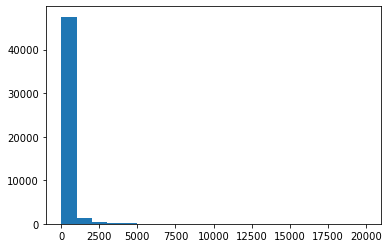

In [128]:
plt.hist(df2.price, bins=20)
plt.xlabel=("price")
plt.ylabel=("Frequency")

לכן אשמור עותק הכולל גם את המוצרים היקרים ואעבוד עם עותק של מוצרים שמחירם קטן מ-1500

In [129]:
df_full=df2.copy() # עותק הכולל את כלל הנתונים 

In [130]:
df2=df_full.copy()

In [131]:
df2.price[df2.price>1500]=np.nan
df2.dropna(inplace=True)
df2.reset_index(inplace=True)
df2.drop(['index'],axis=1,inplace=True)
df2

<ipython-input-131-b196c436023f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.price[df2.price>1500]=np.nan


,super,catgory,product,suplier,price,sizes,units,Vol_Wei,UOM,fat_perc
0,וויקטורי,לחם,לחם אחיד פרוס אנג'ל,אנג'ל,6.60,750 גרם,1,0.750,"ק""ג",-1
1,וויקטורי,לחם,לחם חיטה מלאה אנג'ל,אנג'ל,14.90,750 גרם,1,0.750,"ק""ג",-1
2,וויקטורי,לחם,לחם מחמצת בסגנון איטלקי אנג'ל,אנג'ל,15.90,500 גרם,1,0.500,"ק""ג",-1
3,וויקטורי,לחם,לחם עינן קל פרוס אנג'ל,אנג'ל,14.80,500 גרם,1,0.500,"ק""ג",-1
4,וויקטורי,לחם,לחם פרוס 100% קמח מלא קל בתוספת שיפון אנג'ל,אנג'ל,12.90,750 גרם,1,0.750,"ק""ג",-1
...,...,...,...,...,...,...,...,...,...,...
48336,שופרסל,תוספי מזון,אוטריבייבי תרסיס לאף,אוטרימר,24.90,"15 מ""ל",1,0.015,ליטר,-1
48337,שופרסל,תוספי מזון,אוטרימר תרסיס לאף,אוטרימר,39.90,"100 מ""ל",1,0.100,ליטר,-1
48338,שופרסל,לספורטאים,קולגן בוסט קלאסי,אלטמן,133.19,30 אריזות אישיות,30,0.000,יחידה,-1
48339,שופרסל,לספורטאים,היילופרו,נייצ'רס פרו,109.00,30 מוסות,30,0.000,יחידה,-1


ניתן להבחין שאיבדתי כ-3000 מוצרים. שהם פחות מ- 10% מכלל הדראטה שלי. 

# הצגות גרפיות 

In [132]:
df_union.sample(5)

,super,catgory,product,suplier,sizes,price
23419,שופרסל,לנמנעים מגלוטן,"גרנולה ללא גלוטן ללת""ס","דג""ש",250 גרם,14.8
41337,שופרסל,ניקוי פנים,פדים להסרת איפור בלונס מארז,בלונס,3 * 80 יחידות,18.9
30834,שופרסל,שטיחים,שטיח היילנד 1855/61 מודרני לסלון/חדר שינה,שטיחי כרמל,195X290,981.0
35932,שופרסל,צעצועים ומשחקים,בובת תינוק אמבטיה,unknown,NaN,149.0
37807,שופרסל,בישום נשים,FIRST INSTINCT א.ד.פ לאשה,ABERCROMBIE,"100 מ""ל",119.0


In [133]:
df2

,super,catgory,product,suplier,price,sizes,units,Vol_Wei,UOM,fat_perc
0,וויקטורי,לחם,לחם אחיד פרוס אנג'ל,אנג'ל,6.60,750 גרם,1,0.750,"ק""ג",-1
1,וויקטורי,לחם,לחם חיטה מלאה אנג'ל,אנג'ל,14.90,750 גרם,1,0.750,"ק""ג",-1
2,וויקטורי,לחם,לחם מחמצת בסגנון איטלקי אנג'ל,אנג'ל,15.90,500 גרם,1,0.500,"ק""ג",-1
3,וויקטורי,לחם,לחם עינן קל פרוס אנג'ל,אנג'ל,14.80,500 גרם,1,0.500,"ק""ג",-1
4,וויקטורי,לחם,לחם פרוס 100% קמח מלא קל בתוספת שיפון אנג'ל,אנג'ל,12.90,750 גרם,1,0.750,"ק""ג",-1
...,...,...,...,...,...,...,...,...,...,...
48336,שופרסל,תוספי מזון,אוטריבייבי תרסיס לאף,אוטרימר,24.90,"15 מ""ל",1,0.015,ליטר,-1
48337,שופרסל,תוספי מזון,אוטרימר תרסיס לאף,אוטרימר,39.90,"100 מ""ל",1,0.100,ליטר,-1
48338,שופרסל,לספורטאים,קולגן בוסט קלאסי,אלטמן,133.19,30 אריזות אישיות,30,0.000,יחידה,-1
48339,שופרסל,לספורטאים,היילופרו,נייצ'רס פרו,109.00,30 מוסות,30,0.000,יחידה,-1


In [134]:
df_vol=df2[df2['Vol_Wei']>0].copy()

In [135]:
df_vol=df_vol[df_vol['Vol_Wei']<20].copy()

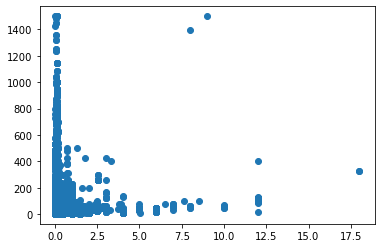

In [136]:
plt.scatter(df_vol['Vol_Wei'],df_vol['price'])

In [137]:
df_fat= df2[df2['fat_perc']>=0].copy()

In [138]:
df_fat

,super,catgory,product,suplier,price,sizes,units,Vol_Wei,UOM,fat_perc
295,וויקטורי,חלב ומשקאות,חלב 1% בקרטון טרה,טרה,11.18,2 ליטר,1,2.00,ליטר,1
296,וויקטורי,חלב ומשקאות,חלב 3% בקרטון טרה,טרה,11.88,2 ליטר,1,2.00,ליטר,3
297,וויקטורי,חלב ומשקאות,חלב 3% בקרטון מהדרין טרה,טרה,11.88,2 ליטר,1,2.00,ליטר,3
298,וויקטורי,חלב ומשקאות,חלב 3% בשקית מהדרין טרה,טרה,5.17,1 ליטר,1,1.00,ליטר,3
299,וויקטורי,חלב ומשקאות,חלב מועשר דל לקטוז 2% טרה,טרה,7.10,1 ליטר,1,1.00,ליטר,2
...,...,...,...,...,...,...,...,...,...,...
6763,שופרסל,תחליפי חלב וטופו,מלוחה 5%,משומשו,19.90,250 גרם,1,0.25,"ק""ג",5
6764,שופרסל,תחליפי חלב וטופו,מלוחה 16%,משומשו,19.90,250 גרם,1,0.25,"ק""ג",16
6790,שופרסל,תחליפי חלב וטופו,מעדן סויה ביו טעם תות 3%,יופלה גו,5.70,200 גרם,1,0.20,"ק""ג",3
6838,שופרסל,תחליפי חלב וטופו,ממרח סויה 9% בטעם טבעי,תנובה אלטרנטיב,8.90,250 גרם,1,0.25,"ק""ג",9


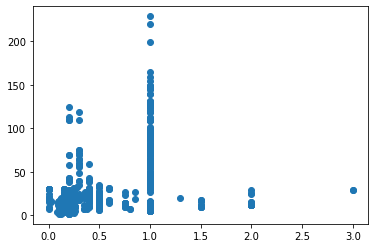

In [139]:
plt.scatter(df_fat['Vol_Wei'],df_fat['price'])

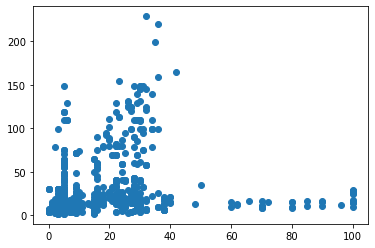

In [140]:
plt.scatter(df_fat['fat_perc'],df_fat['price'])

In [141]:
df2.catgory.unique()

array(['לחם', 'לחמניות ופיתות', 'פריכיות, מצות ותחליפי לחם',
       'מאפייה טריה', 'פירות', 'ירקות', 'פירות יבשים, אגוזים ופיצוחים',
       'חלב ומשקאות', 'משקאות סויה ואורז', "קוטג' וגבינה לבנה",
       'בולגרית, פטה, ומלוחה', 'גבינה צהובה ומוצרלה',
       'גבינות מחלב עיזים או כבשים', 'גבינות קשות', 'גבינות רכות',
       'גבינת שמנת', 'יוגורט', 'מעדנים', 'בשר טרי', 'עוף והודו טרי',
       'בשר ועוף מוכן', 'דגים טריים', 'דגים ארוזים וסושי טרי', 'נקניקיות',
       'נקניקים ופסטרמה', 'חמאה, מרגרינה', 'שמנת ולבן',
       'שמנת לבישול והקצפה', 'סלטים', 'פסטה טריה', 'ביצים', 'טופו וסייטן',
       'חומוס וטחינה', 'רוגלך ומאפים מתוקים', 'גבינות, חמאה ומרגרינה',
       'דגים כבושים', 'נקניק ופסטרמה', 'בשר ועוף', 'דגים',
       'בצקים, מאפים ופיצות', 'ירקות ופירות',
       'שניצל מהצומח וארוחות מוכנות צמחיות',
       'שניצל בשרי וארוחות מוכנות בשריות', 'גלידות וקינוחים',
       'חנות מותג טבעול', 'תבשילים', 'מרקים מוכנים', 'אבקות למרק ולתיבול',
       'קרוטונים ושקדי מרק', 'שימורי ירקות', 'שימ

# למידת מכונה 

In [142]:
df2.sample(5)

,super,catgory,product,suplier,price,sizes,units,Vol_Wei,UOM,fat_perc
31560,שופרסל,ריהוט ואביזרים לאמבטיה,כוס למברשות שינים ומשחה נצמד בוואקום חזק,WENKO,85.47,יח',1,0.0,יחידה,-1
22804,שופרסל,בריאות במקרר,גבנצ קשיו,פלנטי,23.90,200 גרם,1,0.2,"ק""ג",-1
24058,שופרסל,ויטמינים,קו אנזים Q10,נוטריקר,110.00,60 מוסות,60,0.0,יחידה,-1
9905,שופרסל,סיגריות וגפרורים,גפרורים,הנמל,3.20,10 יח',10,0.0,יחידה,-1
23582,שופרסל,לנמנעים מגלוטן,"לחמניה ללא גלוטן כשל""פ",מאפיית אריאל,14.90,400 גרם,1,0.4,"ק""ג",-1


In [143]:
df2.describe()

,price,units,Vol_Wei,fat_perc
count,48341.000000,4.834100e+04,48341.000000,48341.000000
mean,112.799867,6.454159e+04,0.407313,-0.674314
std,223.573263,1.056586e+06,9.398792,3.297842
min,1.000000,0.000000e+00,0.000000,-1.000000
25%,13.900000,1.000000e+00,0.000000,-1.000000
50%,27.900000,1.000000e+00,0.050000,-1.000000
75%,99.000000,1.000000e+00,0.300000,-1.000000
max,1500.000000,1.002173e+08,1250.000000,100.000000


In [144]:
df=df2.copy()
#df["UOM"]=df["UOM"].astype('category')
#df["super_bin"]=df["super"].astype('category')
#df["category_bin"]=df["catgory"].astype('category')
#df["suplier_bin"]=df["suplier"].astype('category')


In [145]:
df=df_vol.copy()

In [146]:
df.sample(10)

,super,catgory,product,suplier,price,sizes,units,Vol_Wei,UOM,fat_perc
41002,שופרסל,טיפוח טבעי,נייטשר נאט קרם לחות תלתל,נייטשר נאט,44.9,"200 מ""ל",1,0.200,ליטר,-1
3326,וויקטורי,משקאות קלים ותה קר,משקה קל אגס תפוח סברס ספרינג,ספרינג,11.9,"250x4 מ""ל",1,0.004,ליטר,-1
4304,וויקטורי,היגיינת הפה,משחת שיניים אורגינל פרודונטקס,פרודונטקס,30.9,"75 מ""ל",1,0.075,ליטר,-1
6987,שופרסל,בשר בקר וכבש,שריר טרי (עצמי),שונות,84.9,מחיר לפי משקל,1,1.000,"ק""ג",-1
22919,שופרסל,בריאות במקרר,מיץ אוכמניות אורגני,כללי,30.9,"330 מ""ל",1,0.330,ליטר,-1
47716,שופרסל,ממרחים ופשתן,פשתן טחון אורגני,טבע מהדרין,9.9,300 גרם,1,0.300,"ק""ג",-1
680,וויקטורי,יוגורט,יוגורט דיאט אננס יופלה,יופלה,4.9,150 גרם,1,0.150,"ק""ג",-1
41048,שופרסל,טיפוח טבעי,סבון מוצק ורד הבר,דר ברונר,23.9,140 גרם,1,0.140,"ק""ג",-1
15094,שופרסל,"עוגות, עוגיות וופלים - ארוז",וופל קואדרטיני שוק.מריר,לואקר,13.9,250 גרם,1,0.250,"ק""ג",-1
15070,שופרסל,"עוגות, עוגיות וופלים - ארוז",טים טם דאבל,טים טם,19.9,200 גרם,1,0.200,"ק""ג",-1


In [147]:
from sklearn.preprocessing import LabelEncoder

In [148]:
df.columns

Index(['super', 'catgory', 'product', 'suplier', 'price', 'sizes', 'units',
       'Vol_Wei', 'UOM', 'fat_perc'],
      dtype='object')

In [149]:
df['super']=LabelEncoder().fit_transform(df['super'])
df['catgory']=LabelEncoder().fit_transform(df['catgory'])
df['product']=LabelEncoder().fit_transform(df['product'])
df['suplier']=LabelEncoder().fit_transform(df['suplier'])
df['UOM']=LabelEncoder().fit_transform(df['UOM'])


In [150]:
df.describe()

,super,catgory,product,suplier,price,units,Vol_Wei,UOM,fat_perc
count,26951.000000,26951.000000,26951.000000,26951.000000,26951.000000,26951.000000,26951.000000,26951.000000,26951.000000
mean,0.851694,139.056324,9683.731550,976.869059,47.128209,1.016400,0.411581,0.561463,-0.417276
std,0.355410,78.085529,5718.207669,568.734622,98.736529,1.724674,0.628363,0.496217,4.393406
min,0.000000,0.000000,0.000000,0.000000,1.440000,1.000000,0.000500,0.000000,-1.000000
25%,1.000000,78.000000,4727.000000,466.500000,11.900000,1.000000,0.100000,0.000000,-1.000000
50%,1.000000,130.000000,9730.000000,987.000000,18.900000,1.000000,0.250000,1.000000,-1.000000
75%,1.000000,200.000000,14623.500000,1498.000000,37.900000,1.000000,0.500000,1.000000,-1.000000
max,1.000000,293.000000,19579.000000,1810.000000,1500.000000,200.000000,18.000000,1.000000,100.000000


In [151]:
df

,super,catgory,product,suplier,price,sizes,units,Vol_Wei,UOM,fat_perc
0,0,122,7939,350,6.6,750 גרם,1,0.750,1,-1
1,0,122,7973,350,14.9,750 גרם,1,0.750,1,-1
2,0,122,8001,350,15.9,500 גרם,1,0.500,1,-1
3,0,122,8019,350,14.8,500 גרם,1,0.500,1,-1
4,0,122,8029,350,12.9,750 גרם,1,0.750,1,-1
...,...,...,...,...,...,...,...,...,...,...
48333,1,286,8742,201,56.0,100 מל,1,0.100,0,-1
48334,1,286,12181,1311,54.9,"50 מ""ל",1,0.050,0,-1
48335,1,286,1464,270,54.9,"50 מ""ל",1,0.050,0,-1
48336,1,286,1462,270,24.9,"15 מ""ל",1,0.015,0,-1


In [152]:
df.price[df.price>500]=np.nan

<ipython-input-152-e40be293c9ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.price[df.price>500]=np.nan


In [153]:
df.dropna(inplace=True)

In [154]:
df.reset_index(inplace=True)

In [155]:
df.drop(['index'],axis=1,inplace=True)

In [156]:
df

,super,catgory,product,suplier,price,sizes,units,Vol_Wei,UOM,fat_perc
0,0,122,7939,350,6.6,750 גרם,1,0.750,1,-1
1,0,122,7973,350,14.9,750 גרם,1,0.750,1,-1
2,0,122,8001,350,15.9,500 גרם,1,0.500,1,-1
3,0,122,8019,350,14.8,500 גרם,1,0.500,1,-1
4,0,122,8029,350,12.9,750 גרם,1,0.750,1,-1
...,...,...,...,...,...,...,...,...,...,...
26695,1,286,8742,201,56.0,100 מל,1,0.100,0,-1
26696,1,286,12181,1311,54.9,"50 מ""ל",1,0.050,0,-1
26697,1,286,1464,270,54.9,"50 מ""ל",1,0.050,0,-1
26698,1,286,1462,270,24.9,"15 מ""ל",1,0.015,0,-1


In [157]:
df.sample(5)

,super,catgory,product,suplier,price,sizes,units,Vol_Wei,UOM,fat_perc
9008,1,7,18902,1735,34.9,600 גרם,1,0.60,1,-1
21664,1,104,16647,3,27.3,"100 מ""ל",1,0.10,0,-1
13799,1,147,17467,1700,89.9,100 מל,1,0.10,0,-1
15130,1,51,4661,641,14.9,"50 מ""ל",1,0.05,0,-1
9396,1,231,12734,1565,6.9,500 גרם,1,0.50,1,-1


In [158]:
X=df.drop(['price','sizes'],axis=1).copy()
y=df['price']

In [159]:
X

,super,catgory,product,suplier,units,Vol_Wei,UOM,fat_perc
0,0,122,7939,350,1,0.750,1,-1
1,0,122,7973,350,1,0.750,1,-1
2,0,122,8001,350,1,0.500,1,-1
3,0,122,8019,350,1,0.500,1,-1
4,0,122,8029,350,1,0.750,1,-1
...,...,...,...,...,...,...,...,...
26695,1,286,8742,201,1,0.100,0,-1
26696,1,286,12181,1311,1,0.050,0,-1
26697,1,286,1464,270,1,0.050,0,-1
26698,1,286,1462,270,1,0.015,0,-1


In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [161]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5340 entries, 8857 to 18122
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   super     5340 non-null   int32  
 1   catgory   5340 non-null   int32  
 2   product   5340 non-null   int32  
 3   suplier   5340 non-null   int32  
 4   units     5340 non-null   int64  
 5   Vol_Wei   5340 non-null   float64
 6   UOM       5340 non-null   int32  
 7   fat_perc  5340 non-null   int64  
dtypes: float64(1), int32(5), int64(2)
memory usage: 271.2 KB


In [162]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21360 entries, 15632 to 2732
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   super     21360 non-null  int32  
 1   catgory   21360 non-null  int32  
 2   product   21360 non-null  int32  
 3   suplier   21360 non-null  int32  
 4   units     21360 non-null  int64  
 5   Vol_Wei   21360 non-null  float64
 6   UOM       21360 non-null  int32  
 7   fat_perc  21360 non-null  int64  
dtypes: float64(1), int32(5), int64(2)
memory usage: 1.1 MB


In [163]:
reg=LinearRegression(fit_intercept=False)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

In [164]:
y_pred

array([32.72014288, 63.7224597 , 33.84783742, ..., 29.9578345 ,
       48.12503674, 25.74028305])

In [165]:
df_chek=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

In [166]:
df_chek

,y_test,y_pred
8857,9.9,32.720143
22863,36.9,63.722460
11401,4.9,33.847837
22312,39.9,63.026715
19310,14.9,24.639956
...,...,...
5289,23.9,43.496401
24231,13.9,61.495763
13331,9.9,29.957835
17746,11.9,48.125037


In [167]:
def sse(Y, Y_HAT):  
    sse = sum([(y - y_hat)**2 for y,y_hat in zip(Y, Y_HAT)])
    return sse

SSE = sse(y_test,y_pred).flatten()

print(SSE)

[19280483.38599872]


In [168]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred).flatten()

array([0.08342283])

In [169]:
print (f"r^2 score: {metrics.r2_score(y_test,y_pred)}")

r^2 score: 0.08342283478458212


In [170]:
for k,v in sorted(dict(zip(X.columns,abs(reg.coef_))).items(),key=lambda x:x[1], reverse=True):
    print(k,v)

super 65.93683333860815
UOM 17.12841647906114
Vol_Wei 6.940292586959158
units 1.7813363065917032
fat_perc 0.3074302341091638
catgory 0.013279875389530812
suplier 0.012987632392027567
product 0.00025560554676673015


# נחמד למצגת....  

In [171]:
df_union[df_union.super=="שופרסל"].catgory.nunique()

212

In [172]:
df_union[df_union.super=="שופרסל"].catgory.unique()

array(['ירקות', 'פירות', 'פיצוחים ופירות יבשים', 'יוגורט ומשקאות יוגורט',
       'מעדנים וקינוחים', 'מוצרי חלב וביצים', 'מדף הגבינות',
       'גבינות מעדנייה', 'מוצרים לאפיה ובישול', 'תחליפי חלב וטופו',
       'מוצרי עוף והודו', 'בשר בקר וכבש', 'דגים', 'מוצרי בשר "על האש"',
       'מוצרים מוכנים לאכילה', 'מנגלים ומוצרים נילווים',
       'לחמים, לחמניות ופיתות מהמאפייה', 'לחם, לחמניות ופיתות',
       'מאפים ועוגות מהמאפיה', 'עוגות ארוזות', 'משקאות חריפים',
       'בירה ומשקאות אנרגיה', 'יינות ותירוש', 'משקאות קלים', 'מים וסודה',
       'תה וקפה', 'קפסולות ופולים לאספרסו', 'סיגריות וגפרורים',
       'ירקות ופירות קפואים', 'מוצרי בשר, עוף ודגים קפואים',
       'מוצרי בצק ומאפה קפוא', 'חומוס וסלטים', 'נקניקים ודגים מעושנים',
       'קינוחים ומנות אחרונות', 'אוכל מוכן/ להכנה מהירה',
       'תחליפי בשר קפוא', 'גלידות', 'קפואים לנמנעים מגלוטן',
       'פסטה, אורז , קוסקוס וקטניות', 'רטבים ותוספות',
       'שמן חומץ ומיץ לימון', 'שימורים', 'מוצרי יסוד ותבלינים',
       'דבש ריבות וממרחים', 'מר

In [173]:
df_union[df_union.super=="וויקטורי"].catgory.nunique()

149

In [174]:
df_union[df_union.super=="וויקטורי"].catgory.unique()

array(['לחם', 'לחמניות ופיתות', 'פריכיות, מצות ותחליפי לחם',
       'מאפייה טריה', 'פירות', 'ירקות', 'פירות יבשים, אגוזים ופיצוחים',
       'חלב ומשקאות', 'משקאות סויה ואורז', "קוטג' וגבינה לבנה",
       'בולגרית, פטה, ומלוחה', 'גבינה צהובה ומוצרלה',
       'גבינות מחלב עיזים או כבשים', 'גבינות קשות', 'גבינות רכות',
       'גבינת שמנת', 'יוגורט', 'מעדנים', 'בשר טרי', 'עוף והודו טרי',
       'בשר ועוף מוכן', 'דגים טריים', 'דגים ארוזים וסושי טרי', 'נקניקיות',
       'נקניקים ופסטרמה', 'חמאה, מרגרינה', 'שמנת ולבן',
       'שמנת לבישול והקצפה', 'סלטים', 'פסטה טריה', 'ביצים', 'טופו וסייטן',
       'חומוס וטחינה', 'רוגלך ומאפים מתוקים', 'גבינות, חמאה ומרגרינה',
       'דגים כבושים', 'נקניק ופסטרמה', 'בשר ועוף', 'דגים',
       'בצקים, מאפים ופיצות', 'ירקות ופירות',
       'שניצל מהצומח וארוחות מוכנות צמחיות',
       'שניצל בשרי וארוחות מוכנות בשריות', 'גלידות וקינוחים',
       'חנות מותג טבעול', 'תבשילים', 'מרקים מוכנים', 'אבקות למרק ולתיבול',
       'קרוטונים ושקדי מרק', 'שימורי ירקות', 'שימ

# כלי עזר

In [175]:
df_union.sizes.value_counts()

יח           1347
יחידה        1275
500 גרם      1231
50 מ"ל       1215
100 מ"ל      1169
             ... 
WKCRM-351       1
814/60/70       1
11115622        1
P653W           1
G461138         1
Name: sizes, Length: 7908, dtype: int64

In [176]:
print(f"*************{df_union.sizes.nunique()}***************\n*********************************")
for x in df_union.sizes.unique():
    print(x) 
    

*************7908***************
*********************************
750 גרם
500 גרם
1 ק"ג
700 גרם
1
600 גרם
6 יח' - 420 גרם
6
8
10
6 יח' - 450 גרם
115x4 גרם
4
5
12 יח' - 600 גרם
70 גרם
80 גרם
140 גרם
200 גרם
60 גרם
160 גרם
264 גרם
120 גרם
135 גרם
30 גרם
150 גרם
8 יח' - 360 גרם
8 יח' - 320 גרם
320 גרם
12 יח' - 756 גרם
100 גרם
250 גרם
190 גרם
230 גרם
300 גרם
100 גרם, כ-2 יח'
500 גרם, כ- 3-5 יח'
500 גרם, כ- 2 יח'
500 גרם, כ- 5 יח'
500 גרם, כ- 1 יח'
500 גרם,כ- 5 יח'
500 גרם, כ- 3-4 יח'
500 גרם כ- 2-3 יח'
כ-1.3 ק"ג
350 גרם
380 גרם
כ1.25 ק"ג
כ1.4 ק"ג
כ400 גרם
400 גרם
450 גרם
2
500 גרם, כ-3-4 יח'
500 גרם, כ- 2-3 יח'
475 גרם
500 גרם, כ - 1 יח'
500 גרם, כ- 2-4 יח'
330 גרם
22x4 גרם
40.5 גרם
2 ליטר
1 ליטר
1.5 ליטר
800 מ"ל
250 מ"ל
225x8 מ"ל
225 מ"ל
350 מ"ל
230 מ"ל
340 מ"ל
250x3 מ"ל
236 מ"ל
125 גרם
139 גרם
375 גרם
225 גרם
6 יח' - 120 גרם
360 גרם
172 גרם
180 גרם
8 יח' - 120 גרם
170 גרם
256 גרם
4 יח' - 100 גרם
16 יח' - 240 גרם
8 יח' - 200 גרם
265 גרם
150x8 גרם
130 גרם
200 מ"ל
3 ליטר
58x6 גרם
150 מ"ל
5

XN3045
Mini D30 אדום
Mini D30
AR-C91A
EP2220/10
en750
ECAM22.110.B
TP-808
ESAM 3000
ESAM 2600
EC685
Lattissima ONE
ATL-5010
AR-C01A
CM5310
EN560
AR-C50A
Lattissima Touch
VCF125
AR-C50B
E61
VCF126X
EC785
23.460
Aroma Solo
Viva Chic
Cadorna Milk
Magenta Milk
Gaggia
מליטה
Mini Twist
SE-974
בלנדר EF-116
מטחנה EF-530
*
HYKM-900S
TSM6A017C
ATL-27
HABT-8802
LA705
KG200
Severin SM3584
La707
EF-1002
EF-1028
10 יח'
10 חפיסות
10יח
חפ
יח'
חפיסה
28 יחידות
24 יחידות
120 יחידות
560גרם
572גרם
644גרם
1.5 קג
2.5קג
1.5ק"ג
125גרם X 3 יחי'
450  גרם
700 גרם )40 יח'(
800 גרם )12 יח'(
2 יח' - 430 גרם
380גרם
385 גרם
700 גרם )6 יח'(
1קג 5יח
750 גרם )5 יח'(
600 גרם )18 יח'(
240גרם
750גרם
2 * 400 גרם
400 + 400 גרם
2 יח' X 350 גרם
2 יח * 300 גרם
140גרם
1.900 קג
2 יח' X 180 גרם
280 גרם,
192 גרם
228 גרם
657.5 גרם
164גרם
261 גרם
1קג (כ-50 יחי')
800 גרם ברוטו
1 ק"ג ברוטו
גרם226
525
227 גרם
480גרם
1.25 קג
500 מל
1.4 ליטר
428 מל
500מל
428 גרם
473מ"ל
428גרם
433 גרם
440 מל
ללא חלב 408ג
417 גרם
396גרם
ללא חלב473מל
1.33 ליט

545 גרם
400מ"ל
760 גרם
230 גר
145גרם
7*יחידות
120 גר
678 גרם
113*4 גרם
5 * 22 גרם
5 * 21 גרם
3 * 60 גרם
11 יח X 25 גרם
15יח*10גרם
100 שקיקים
300 טבליות
100שקיות
100 שקיות
150 טבליות
200 שקיות
55 שקיות
700 טבליות
1200 טבליות
800 טבליות
1' גר X '250 יח
75 גר'
80 שקיקים* 1 גרם
20 שקיקים* 1 גרם
3 * 21.50 גרם
208 גרם
592 מ"ל
6 * 13 גרם
4 * 22 גרם
498 גרם
50  גרם
16 * 50 גרם
100 טבליות
60 כדורים
60 כמוסות
50 כמוסות
60 טבליות
120 קפליות
100כמוסות
90 לכסניות
200 טבליות
100 כמוסות
90 טבליות
250 טבליות
60 יח'
100 דובדבנים
100 דובונים
100 קפליות
60 סוכריות גומי
טבליות 50
90 כמוסות
30 כמוסות
60 יח
120כמוסות
90 כמוסות רכות
60 טבליות לעיסה
75 כמוסות
180 כמוסות
60 מ"ג
20 דובונים
60 דובונים
110 סוכריות ג'לי
30אריזות אישיות
45 קפליות
60 טבלית
30 קפליות
180 טבליות
30 אריזות אישיות
28 שקיות
80 כמוסות
30 שקיקים
30 קפסולות
30 כמוסות רכות
60 כמוסות צמחיות
50 כפסולות
60 קפליות
60 כפסולות
30כמ'
60כמ'
60 קפסולות
*60
90טבליות
60 אריזות אישיות
50 קפליות
60 לכסניות
5 גרם
60כמוסות
120 כמוסות
200 כמוסות
90*2 כמוסות

CF400X
CF400A
CF401A
CF403A
CF402X
CF401X
CF226A
CF403X
SU705A
CF280A
ARMOR
SL-111
ארגנומיות עם מיק
Logitech
X1800S E.H
GPDRA-WCAM
GPDRA-WCAM2K
2K Pan & Tilt לב
Mi BOX S
4A EU
Mi WiFi  AC1200
RUT950
Mi Router 4C
2A W15
חום
X/Xs אד
X/Xs אפור
X/Xs חום
X/Xs
Galaxy S20 Ultra
iP XR
IP11 PRO Max
IP11
IP12 6.1
6.7
IP12 5.4
iP Xs Max
גלקסי 9 אפור
IP12 6.7
S20 Plus
S20
Tech21
iPX/Xs
X/Xs  שחור
X/Xs  אפור
X/Xs  חום
X/Xs  ורוד
NOTE 10 PLUS
IP11 Pro
Galaxy S10+
00
NOTE 10
Pure Shimmer I
IP11 pro
18W  USB CTC
2A 5W
MFI 2.4A
39W 2 Port QC 3.
Nano 20W
מטען רכב
apple
גלקסי S21
סוללת גיבוי
PD 30W 2-Port
מטען  PD 33W
MFI2
TYPE
VALUE PRO
שחור 1.8 מטר
1.8 מטר
TO USB-C
C TO L 1.2
SSD PLUS 1T
כבל  C TO C 1.2
MINF1800
מעמד הטענה
שחור 1.2 מטר
MFI TO USB-A
STDRASCC
Dashboard
Magnetic Air Ven
Magnetic Dashboa
Magnetic Premium
Magnetic
Magnetic Mini Da
Magnetic Telesco
Bike
Oculuce Quest 2
MQiWM605
wifi לרכב
MQiWM505
TRACKER 360
GoPro Hero 9 Bl
102090
SUPER
BASIC
SMART
FFS7238WEE
PD8F4G
WAJ2006GPL
L6FBI27W
TDLR6

LNF6531BV-C
EF-580B
PFD617SS
EF-560N
LUX NF4D595SG
GL-F682HQHL
EF-580N
EF-400
BCW-48A
SER NF535BG
LNF-6631CR
LUX NF4D595WG
HRF472FW
LNF-6631S
GL-F682HLHL
LUX NF 615 W
NF4D595INOX
LUX NF 615 CH
LUX NF4D595DS
LUX NF 615 INOX
LUX NF 615 DS
LUX NF485 INOX
LUX NF485 DS
LUX NF545 W
LUX NF545 DS
LUX NF545 INOX
LUX NF4D595CHG
LUX NF535SG
LUX NF535INOX
KL-916IX
ND 46S
SER NF4D595INOX
SER NF 615 INOX
SER NF 615 DS
SER NF485 INOX
SER NF545 INOX
SER NF545 DS
SER NF4D595DS
SER NF4D595BG
SER NF4D595SG
SER NF4D595WG
SER NF226S
SER NF 615 CH
SER NF545 W
SER NF4D595CHG
SER NF535CHG
EF-680N
EF-480N
EF-380
EF-380T
EF-480
EF-580W
EF-680
EF-560B
EF-260T
NE-MIFT2450
PFN633W
222 ליטר NF
PF7N37W
PF6D45W
ND 112
EFR-204T
MIFNT3910
EFR-204
LFZ376
EFR-206T
EFR-206
UI6F1TS
LFZ2551
DL-260G
DL-600G
DL-560
LFZ377V-WN
HS-208FW
מקפיא EFR-440
DL-360G
EF-520
DL-780
DL-460G
60 ס"מ, SMD40
SMS43D08ME
SMD1
SMS43D02ME
PDW-12SS
PDW12
SMS4HBW00N
SMV4HCX48E
SN23HI42VE
SMI2ITS33
MY54W
MY54S
WQP6-3602F-W
SPV4HKX45E
SK26E32EU
SMS2I

10.5"
6"
10.5 ס"מ פורצלן
8 ס"מ פורצלן
QUARTZO
15.5"
13.5"
25 ס"מ
17.6ס"מ
19.8ס"מ
22.4ס"מ
17ס"מ
20ס"מ
22ס"מ
1 / 1.4 / 2 ליטר
1139141
1139145
z10098
1137877
1137878
1500 מ"ל
1.85 ליטר
2.2 ליטר
בינונית
47X29 ס"מ
11X7.5 ס"מ
מנה עיקרית 10"
מנה ראשונה 8"
23X9 ס"מ
אקריל 3  חלקים
12X22 ס"מ
אקריל 29 ס"מ
9"
במבוק
17X7.5 ס"מ
TO GO
1/2 ליטר
430 מ"ל
800מ"ל
3 כוסות
6 כוסות
9 כוסות
כחול  כהה
140/190
DOMO
דו מושבית
צהוב חרדל
120/190 ס"מ
אלפא-תכלת
רוחב 2.40 מ'
רוחב 2.80 מ'
275*310 סמ
רוחב 2.70 מ'
רוחב 2.90 מ'
ספה תלת נלה
רוחב 2.90 מ
צהוב
אפור בהיר
הילה צהוב חרדל
הרכבה חינם
ZL6072
סטונווש
שוקולד
קש
74/65/86 ס"מ
קפוצינו
אוליביה
בוניטה
56/56/80
אדום ורוד
ליברפול
דובר
TAL-1-12
TAL-1-10
TAL-1-11
TAL-1-2
50X50X30 ס"מ
70X70X30 ס"מ
50*50*30 ס"מ
70X70X20 ס"מ
120 ס"מ
80/80
618
618-4
614
זית
343
אפור כהה
דגם 622
דגם 614
342
80/90
604-6
603
חול טבעי וזית
85/85
צהוב/שחור
283838
290645
290641
315938
321352
321137
322746
ROMA
מיזורי
פלורידה
מרילנד
דקוטה
טקסס
אריזונה
קליפורניה
אלסקה
קולורדו
דגם 627
נועם
3 מגירות
40/48

GC -HC 9024 T
smart
E-CH 1846 Lilo
GE-CL 18 Li-Solo
GE-CL 36 Li E
דגם  20-1M
TE-CB 18/180 Li
185*247*208
1000W
58*42*20
229*244*367
GE-EM 1536
40*7*5
61/62.5/6 ס"מ
208*185*247
268.5*244.5*244.
268.5*244.5*364
125*26*16.5
244*367*229
GE-HC 18 Li T-So
פרו ג'ל להדברת נ
מלכודת עכברים 4
לוכד זבובים גולד
מלכודת עכברים חו
לוכד זבובים שקית
200 גרם לחצר
דשא סינטטי
חבילה
פיקס ג'ל+סופר ג
500 גרם לחצר
לוכד זבובים צנצנ
מלכודת עכברים מק
עם תחנה 15 גרם
מלכודת לזבובי פי
5 + 1/2 ליטר
מלכודת עכברים 2
מלכודת חולדות מק
BND24 סט
274/152/76
גובה1.97
LIVERPOOL
MJ-3
BLUE SKY 6
BANDITO
BANDITO BLACK
146.2X118.4X126.
115.5*108*140
176*190*220 ס"מ
מידה:195X144X47
56457
56629
220X150X60 ס"מ
239X206X86 ס"מ
366X76 ס"מ
400X211X81 ס"מ
300X200X75 ס"מ
404/201/100 ס"מ
424/250/100 ס"מ
300X200X66 ס"מ
259X170X61 ס"מ
404X201X100 ס"מ
732X366X132 ס"מ
527X254X122 ס"מ
122X122X30 ס"מ
120/100/22 ס"מ
משולבת
262X160X46 ס"מ
168X46ס"מ
262X175X56 ס"מ.
188X46סמ
קוטר 76 סמ
305X183X56 ס"מ
150X110X52
210X135X60
עם מגלשה
295X199X130 ס"מ
30

אנטי סליפ לבן זו
אנטי סליפ אפור צ
אנטי סליפ שחור
אנטי סליפ עם פס
סגר על בבליסטר
גלנצר נוזל
פיתיון זבובים
פיתיון צרעות
לוכד צרעות
אקדח לכוחלה
סרט בד
דבק אפוקסי
דבק מהיר לעץ
דבק לפלסטיק
דבק רב שימושי
מדבקות פלסטלינה
דבק לקיטים
דבק לבדים
דבק לנעליים
אקדח סיליקון
ספריי מסיר סופר
סרט לתריס
גלגל מתכת לכביסה
סיליקון סנטירי ה
אקווהפלסט שפכטל
אקווהפלסט מקצועי
אקווהפלסט מלט מה
אקווהפלסט גמיש ל
אקווהפלסט חיצוני
אקווהפלסט גמיש (
אקווהפלסט סופר א
אקווהפלסט דבק שפ
אקדח סיליקון MAX
אקדח לנקניקים טו
אקדח לנקניקים MA
אקדח סיליקון X24
אקדח לנקניקים X2
עוגן כימי מקס 28
דבק טפטים אנגלי
חומר להסרת כתמים
נוזל לניקוי סילר
סאג מסיר שומנים
סאג אבן הקסם
אנטי סליפ
יחידה 4 ליטר
4ליטר
14 אוניברסלי
13600MAH
9,000 mAh
מזוודת תיקון פנצ
סט מראות לרכב 2
לחיות מחמד
7200MAH
ספרי פנצר
KR-101
13000MAH
סט הצללה לרכב
13,600 מיליאמפר
ko20000
TS-G1310F
מיני קומפרסור
רודסטאר
TIPPY SMART PAD
קומפרסור
22,800
אנדרואיד 7
+מחזיק
TS-G1615
KR-180
KR-330
13 אינץ' שחור
15 אינץ' אדום
16 אינץ' אדום
15 אינץ' כחול
עד 60 ק"ג
זוג נורות 12V
"1

In [177]:
df_union["price"].describe()

count    49878.000000
mean       197.898768
std        611.770718
min          1.000000
25%         13.900000
50%         29.900000
75%        109.000000
max      19990.000000
Name: price, dtype: float64

In [178]:
pd.cut(df_union["price"],bins=20).value_counts()

(-18.989, 1000.45]     47562
(1000.45, 1999.9]       1366
(1999.9, 2999.35]        504
(2999.35, 3998.8]        182
(3998.8, 4998.25]        127
(4998.25, 5997.7]         58
(5997.7, 6997.15]         23
(6997.15, 7996.6]         22
(7996.6, 8996.05]         14
(9995.5, 10994.95]         6
(8996.05, 9995.5]          5
(12993.85, 13993.3]        5
(15992.2, 16991.65]        2
(11994.4, 12993.85]        1
(18990.55, 19990.0]        1
(10994.95, 11994.4]        0
(13993.3, 14992.75]        0
(14992.75, 15992.2]        0
(16991.65, 17991.1]        0
(17991.1, 18990.55]        0
Name: price, dtype: int64

# עזרים גרפיים 

<AxesSubplot:ylabel='catgory'>

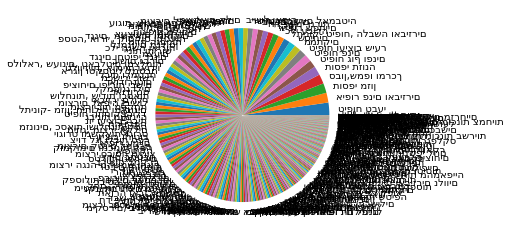

In [179]:
df_union['catgory'].value_counts().plot(kind='pie')

<AxesSubplot:>

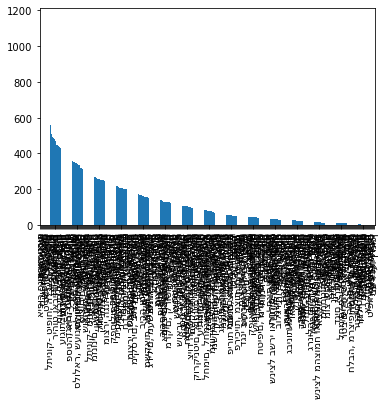

In [180]:
df_union['catgory'].value_counts().plot(kind='bar')

In [181]:
sum(df_union.price>200)

7862

In [182]:
sum(df_union.price<200)

42003

In [183]:
sum(df_union.price<2000)

48928

In [184]:
sum(df_union.price>2000)

950

TypeError: 'str' object is not callable

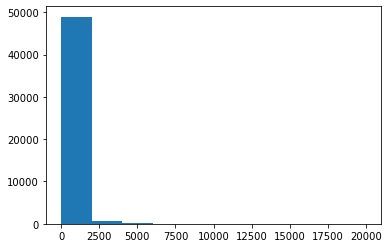

In [185]:
plt.hist(df_union.price, bins=10)
plt.xlabel("price")
plt.ylabel("freq")

In [ ]:
df_union[df_union.super=="שופרסל"].head()

In [ ]:
for x in [df_union.super=="שופרסל"].catgory.unique():
    print (x)

In [ ]:
df_union.catgory.unique()

In [ ]:
pd.cut(df_union["price"],bins=20).value_counts()